<a href="https://colab.research.google.com/github/dkavali/data602_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA 602 Final Project**

  



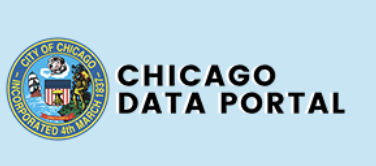

# **Section 1: Introduction and Background Information**

For my final project, I will be exploring, visualizing, and generating machine learning models using a large dataset from the city of Chicago Data Portal. This dataset contains information on reported crimes committed in the city of Chicago from 2001 - 2020. Each row in the dataset represents a reported crime and each column represents a feature the likes of which include when the reported crime occurred, which community area of Chicago (region of the city) the crime occured in, whether an arrest was made, and a description of the crime, among others. The specifics of the dataset will be shown in detail in the Exploraratory Data Analysis (EDA) section. The purpose of this annotated notebook is to draw conclusions, elucidate relationships, and create predictive models in order to help better understand trends and patterns in human behavior as it pertains to criminal activity. 

The end goal of this analysis is to come away with some tangible knowledge of what the future of crime in Chicago may look like, i.e. create a rigourous predictive model. Thus, the end of this notebook is committed to creating models via machine learning that try and use past crime data contained in the feature space of this dataset to try and predict metrics such as location-based crime estimates, whether criminals will be caught (number of arrests made), and how many of a certain type of crime will occur in different areas of Chicago. The goal of these predictions is to help government better allocate resources and enhance the safety of citizens in Chicago by better informing them of what is going on in their city and what will most likely happen in the future. The overarching goal of this notebook is to shed some light on life in Chicago in regards to criminal activity and make interesting observations.  

Throughout the notebook I will provide explanations / paragraphs describing the analysis that is being computed in order to facilitate easy understanding of the code that is included. 

#**Section 2:** **Exploratory Data Analysis**

The first step in this project is complete exploratory data analysis, essentially working to understand the data we are dealing with and its various features. Let's start with loading the required packages and loading in the dataset. 

In [ ]:
#Import the required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#setup to read data from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#First Load in the Data from google drive 

#Save the shareable link to the data to the link_to_data variable 
link_to_data = 'https://drive.google.com/open?id=1Mh9_GqSzHz8SLHA2qD5AiMw2OSWGuRxx'

#Pull out the id
undesired, id = link_to_data.split('=')
print (id)

#download the data
data_download = drive.CreateFile({'id':id})
data_download.GetContentFile('Crimes_-_2001_to_present.csv')

#read in the .csv file
crime_df_raw=pd.read_csv('Crimes_-_2001_to_present.csv')


1Mh9_GqSzHz8SLHA2qD5AiMw2OSWGuRxx


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#look at the raw data
crime_df_raw.head() 

ID Case Number                    Date  ... Latitude Longitude Location
0  11034701    JA366925  01/01/2001 11:00:00 AM  ...      NaN       NaN      NaN
1  11227287    JB147188  10/08/2017 03:00:00 AM  ...      NaN       NaN      NaN
2  11227583    JB147595  03/28/2017 02:00:00 PM  ...      NaN       NaN      NaN
3  11227293    JB147230  09/09/2017 08:17:00 PM  ...      NaN       NaN      NaN
4  11227634    JB147599  08/26/2017 10:00:00 AM  ...      NaN       NaN      NaN

[5 rows x 22 columns]

As we can see in the preview of the dataframe shown above our dataframe has some null values in it (the NaN's). Let's drop the null values from the dataframe and see what effect that has.

In [ ]:
#Drop null values from the data set 
crime_df_dropped_na=crime_df_raw.dropna()# drop the null values in the dataset
#Take a look at the crime df with no null values
crime_df_dropped_na.info()# Dataset with dropping nulls has 6,425,385 rows. 90.44 % of the data is retained (raw data has 7,104,657). Thus we will proceed will only non-null valued data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6425385 entries, 60298 to 7104654
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), obje

After any row from the dataframe with a null value from the raw imported dataframe we see that we retain 90.44% of the rows in the data (6,425,385 rows remain). Since we have such a high data rentention rate we will proceed with this cleaned dataframe. We also see each of the column names and datatypes above, so we have a feel for what features are available in this dataset. See a preview of the dataset with all null values dropped below.

In [ ]:
#Take a look at the cleaned crime dataframe
crime_df_dropped_na.head()

ID Case Number  ...  Longitude                       Location
60298  11556037    JC103643  ... -87.906094   (42.002816387, -87.90609433)
62218  11626027    JC188126  ... -87.633860   (41.88336939, -87.633860272)
62559  11622422    JC183696  ... -87.606781  (41.825346902, -87.606780575)
62592  11625922    JC185669  ... -87.672499  (42.016541612, -87.672499325)
62593  11622907    JC185406  ... -87.606961    (41.825298645, -87.6069609)

[5 rows x 22 columns]

**Transitioning to Spark**

We want to join this dataframe with our cleaned crime dataframe along with perform many other operations later. Due to the large size of the cleaned crime dataframe, doing all of these things will require quite a lot of computations, so we will now use Apache Spark and SQL to complete these tasks. SQL will use optimize our run time by using relational operators in order to decrease computation time. We will use Apache Spark locally for this section and then expand Spark to a sharded architecture with AWS EMR later in the modeling and machine learning section of this annotated notebook (our models will require more computational power than one single machine due to the large size our dataset!) 

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 29 not upgraded.
Need to get 40.7 MB of archives.
After this operation, 153 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [1

In [ ]:
#Set up Apache Spark
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libcom-err2 libgssrpc4 libkadm5clnt-mit11
  libkadm5srv-mit11 libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
The following packages will be upgraded:
  libcom-err2
1 upgraded, 7 newly installed, 0 to remove and 28 not upgraded.
Need to get 358 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcom-err2 amd64 1.44.1-1ubuntu1.3 [8,848 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.1 [54.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.1 [37.2 kB]
Get:4 http

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [844 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('545_final_proj').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


In [ ]:
#load data into spark 
raw_crimes_sdf = spark.read.format('csv').options(inferSchema=True,header=True).load('Crimes_-_2001_to_present.csv')

In [ ]:
#drop null values as we did before
raw_crimes_sdf=raw_crimes_sdf.dropna()


Before we continue let's clean up the data a bit more by converting the columns to the appropriate data types and renaming the column names with spaces to have underscores instead of spaces. This is a bit of "data-wrangling"- a huge part of data science.

In [ ]:
#Lets continue cleaning up the data by renaming all the columns with white spaces in them to have underscores
import pyspark.sql.functions as f
from pyspark.sql.functions import from_unixtime, unix_timestamp, col
crimes_sdf=raw_crimes_sdf
crimes_sdf=crimes_sdf.withColumnRenamed("Primary Type", "Primary_Type")
crimes_sdf=crimes_sdf.withColumnRenamed("Case Number", "Case_Number")
crimes_sdf=crimes_sdf.withColumnRenamed("Location Description", "Location_Description")
crimes_sdf=crimes_sdf.withColumnRenamed("Community Area", "Community_Area")
crimes_sdf=crimes_sdf.withColumnRenamed("FBI Code", "FBI_Code")
crimes_sdf=crimes_sdf.withColumnRenamed("X Coordinate", "X_Coordinate")
crimes_sdf=crimes_sdf.withColumnRenamed("Y Coordinate", "Y_Coordinate")
crimes_sdf=crimes_sdf.withColumnRenamed("Updated On", "Updated_On")

crimes_sdf.createOrReplaceTempView('crimes_sdf')

#convert Data column to timestamp format
crimes_sdf= crimes_sdf.withColumn('Date', from_unixtime(unix_timestamp(col(('Date')), "MM/dd/yyyy hh:mm:ss aa"), "yyyy-MM-dd HH:mm:ss"))

crimes_sdf.createOrReplaceTempView('crimes_sdf')

date_time_query_1='''SELECT crimes_sdf.*, to_timestamp(crimes_sdf.Date, 'yyyy-MM-dd HH:mm:ss') AS Date_Cleaned_Final from crimes_sdf'''

#to get the hour: 
#hour(to_timestamp(crimes_sdf_1.Date, 'yyyy-MM-dd HH:mm:ss'))
crimes_sdf=spark.sql(date_time_query_1)

crimes_sdf.show(20,False)


+--------+-----------+-------------------+---------------------+----+--------------------------+-------------------------------------------------+---------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+-------------------+
|ID      |Case_Number|Date               |Block                |IUCR|Primary_Type              |Description                                      |Location_Description             |Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|Updated_On            |Latitude    |Longitude    |Location                     |Date_Cleaned_Final |
+--------+-----------+-------------------+---------------------+----+--------------------------+-------------------------------------------------+---------------------------------+------+--------+----+--------+----+--------------+--------+------------+------

Check out the cell below to see the updated datatypes of our spark dataframe after we have cleaned it up.

In [ ]:
crimes_sdf.dtypes

[('ID', 'int'),
 ('Case_Number', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary_Type', 'string'),
 ('Description', 'string'),
 ('Location_Description', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'int'),
 ('District', 'int'),
 ('Ward', 'int'),
 ('Community_Area', 'int'),
 ('FBI_Code', 'string'),
 ('X_Coordinate', 'int'),
 ('Y_Coordinate', 'int'),
 ('Year', 'int'),
 ('Updated_On', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string'),
 ('Date_Cleaned_Final', 'timestamp'),
 ('Community_Area_Numeric_Code', 'string'),
 ('Community_Area_Name', 'string')]

**The First EDA Metric: What is the time span of our data?**

Lets now see which point in time the data starts at and when it stops

In [ ]:
#Investigate time windows
crimes_sdf.createOrReplaceTempView('crimes_sdf')

date_range_query=''' SELECT MAX(crimes_sdf.Date_Cleaned_Final) AS Last_Day_Data_Available, MIN(crimes_sdf.Date_Cleaned_Final) AS First_Day_Data_Available FROM crimes_sdf'''

date_bounds=spark.sql(date_range_query)

date_bounds.show()


+-----------------------+------------------------+
|Last_Day_Data_Available|First_Day_Data_Available|
+-----------------------+------------------------+
|    2020-04-11 23:55:00|     2001-01-01 00:00:00|
+-----------------------+------------------------+



So we see above that our dataset has records of crimes from January 1st 2001 to April 11, 2020. 

**How Many Unique Values Do We Have In Columns Of Interest?**

Our dataset is quite large and we now need to really understand what each of the columns in the dataset looks like. Let's look at all the different types of entries in the Primary Type, Description, Beat, Community Area and Location Description columns. 

In [ ]:
#get a count of all unique entries of the columns in question and what those values are 
crimes_sdf.createOrReplaceTempView('crimes_sdf')

query_unique_counts='''SELECT COUNT(DISTINCT crimes_sdf.Primary_Type) AS Num_Unique_Primary_Type, COUNT(DISTINCT crimes_sdf.Description) AS Num_Unique_Description, COUNT(DISTINCT crimes_sdf.Location_Description) AS Num_Unique_Location_Descriptions, COUNT(DISTINCT crimes_sdf.Community_Area) AS Num_Unique_Community_Area, COUNT(DISTINCT crimes_sdf.Beat) AS Num_Unique_Beat FROM crimes_sdf'''

distinct_sdf=spark.sql(query_unique_counts)

distinct_sdf.show()


+-----------------------+----------------------+--------------------------------+-------------------------+---------------+
|Num_Unique_Primary_Type|Num_Unique_Description|Num_Unique_Location_Descriptions|Num_Unique_Community_Area|Num_Unique_Beat|
+-----------------------+----------------------+--------------------------------+-------------------------+---------------+
|                     35|                   507|                             212|                       78|            303|
+-----------------------+----------------------+--------------------------------+-------------------------+---------------+



So we can see that there are 35 uniqueprimary types of crimes, 507 unique types of crime descriptions (which give a bit more detail on an offense), 212 unique location descriptions (which provide a few words on the surroundings where an offense occured), 78 community area numeric codes, and 303 unique beats (areas and times in the city a member of the police force will supervise) present in the dataset. 

**The First EDA Plots: Primary Crime Types, Community Areas, and Location Descriptions**

Lets Now Make Some Plots Showing How Often Each of the Values in the the Primary Crime Type, Community Area, and Location Description Occur

In [ ]:
#Create bar plots using groupby on each of the columns 

query_primary_type=''' SELECT Primary_Type, COUNT(Primary_Type) AS Count FROM crimes_sdf GROUP BY Primary_Type ORDER BY Count DESC LIMIT 37 '''

Primary_type_plot_sdf=spark.sql(query_primary_type)

query_location_description=''' SELECT Location_Description, COUNT(Location_Description) AS Count FROM crimes_sdf GROUP BY Location_Description ORDER BY Count DESC LIMIT 25'''

loc_desc_sdf=spark.sql(query_location_description)

comm_area_count_query=''' SELECT Community_Area, COUNT(Community_Area) AS Count_comm FROM crimes_sdf GROUP BY Community_Area ORDER BY Count_comm DESC LIMIT 25'''

comm_area_sdf=spark.sql(comm_area_count_query)

comm_area=comm_area_sdf.toPandas()

loc_desc=loc_desc_sdf.toPandas()

primary=Primary_type_plot_sdf.toPandas()

[Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '19'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '32'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '46'),
 Text(0, 0, '49'),
 Text(0, 0, '53'),
 Text(0, 0, '61'),
 Text(0, 0, '66'),
 Text(0, 0, '67'),
 Text(0, 0, '68'),
 Text(0, 0, '69'),
 Text(0, 0, '71')]

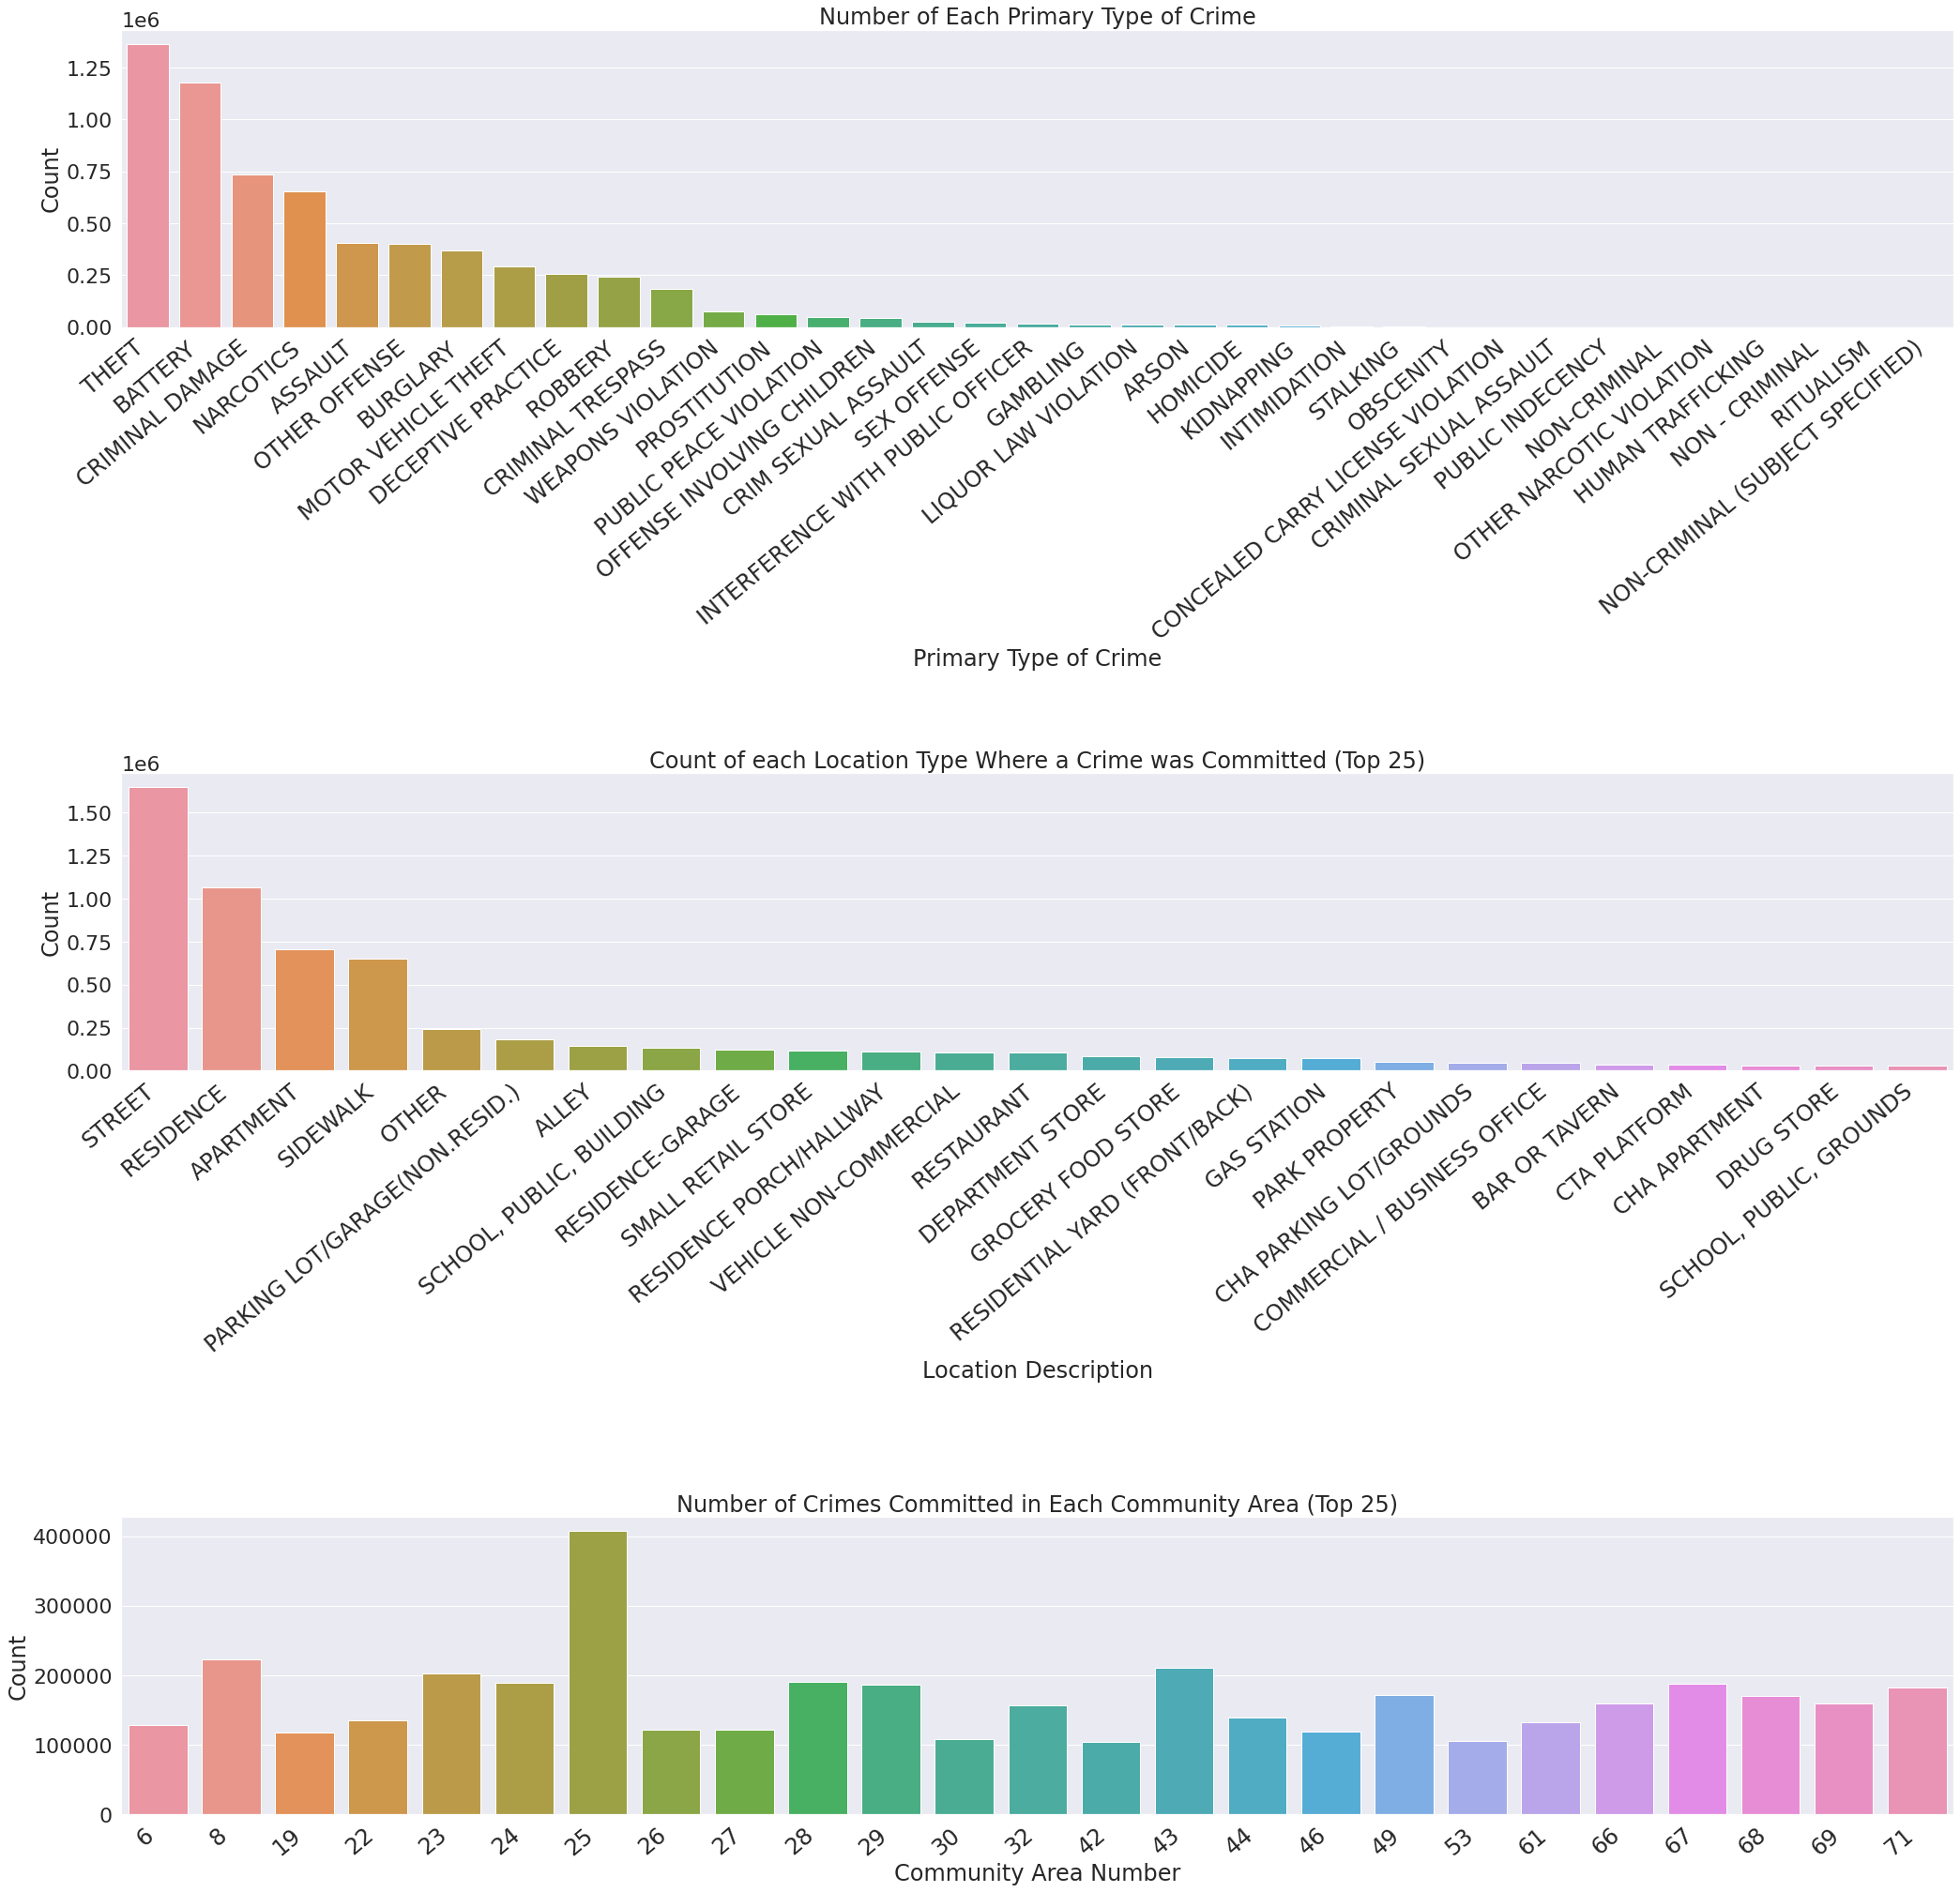

In [ ]:
#Create bar plots using seaborn
figure,axes=plt.subplots(nrows=3,ncols=1,figsize=(35,35))
plt.subplots_adjust(wspace=0.5,hspace=1.5)
#sns.set(font_scale=2)

#create bar plot for primary type of crimes
barplot=sns.barplot(x=primary.Primary_Type,y=primary.Count,data=primary,ax=axes[0])
barplot.set(title='Number of Each Primary Type of Crime',ylabel='Count',xlabel='Primary Type of Crime')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=40,horizontalalignment='right',fontsize='medium')

#create bar plot for location description
barplot=sns.barplot(x=loc_desc.Location_Description,y=loc_desc.Count,data=loc_desc,ax=axes[1])
barplot.set(title='Count of each Location Type Where a Crime was Committed (Top 25)',ylabel='Count',xlabel='Location Description')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=40,horizontalalignment='right',fontsize='medium')

#create bar plot for location description
barplot=sns.barplot(x=comm_area.Community_Area,y=comm_area.Count_comm,data=comm_area,ax=axes[2])
barplot.set(title='Number of Crimes Committed in Each Community Area (Top 25)',ylabel='Count',xlabel='Community Area Number')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=40,horizontalalignment='right',fontsize='medium')

Let's analyze each of the three plots above. In the top plot we see that there is a big disparity in the count of different types of crime. Specifically we see that there are many more thefts, batteries, and criminal damage offenses compared to an offense like ritualism or public-indencency. This is important for law enforcement to know so that it can allocate resources effectively. Relative to the other crimes being committed in Chicago, seems like theft is the most widespread problem. 

In the second plot we see that the most common place where a crime (of any type) is committed is in a street, followed by a residence, followed by an apartment. Thus, residents of Chicago are most at risk (all over things equal) for having an offense committed against them in a street. From this plot we see things that we would mostly expect. The plot also shows that bars and taverns, restaurants, and stores are generally pretty safe places.

In the third plot we see that there is a major disparity in the overall number of reported crimes throughout the city of Chicago. We see that community area number 25 and number 8 have the highest number of reported crimes. It is important to note that this plot is displaying counts, and as such it is not normalized against population. 



**Investigating Community Areas: Web Scraping!**

While we have the Community Area numeric codes in our dataframe, most people aren't familar with numeric codes, but they are familar with the names of the community areas (the common names these areas go by). It turns out that Wikipedia has data containing the names of the community areas for each of the community area numeric codes. Lets webscrape that data and bring it into our data frame so we can understand what our community area codes mean!



image.png

In [ ]:
#Import the libraries for the webscrape
import requests
from lxml import html

In [ ]:
#Webscrape the link 

#gather the link
page_requested =requests.get('https://en.wikipedia.org/wiki/Community_areas_in_Chicago')
#build the dom tree
dom_tree=html.fromstring(page_requested.content)

##Retrieve the community areas for the Chicago##

central_num_list=[]
central_community_area_list=[]
#iterate through each table on the page 
for table in range(1,10):
  table=str(table)
  #iterate through the items in each table 
  for number in range(2,50):
    number=str(number)
    num=dom_tree.xpath('/html/body/div[3]/div[3]/div[4]/div/table['+table+']/tbody/tr['+number+']/td[1]/text()')
    com_area=dom_tree.xpath('/html/body/div[3]/div[3]/div[4]/div/table['+table+']/tbody/tr['+number+']/td[2]/a/text()')
    central_num_list.append(num)
    central_community_area_list.append(com_area)

#delete the empty lists created
cleaned_num_list=[entry for entry in central_num_list if entry !=[]]
cleaned_com_area_list=[entry for entry in central_community_area_list if entry !=[]]

#Clean up the lists
final_central_nums=[]
final_central_com_areas=[]
for i in range(0,len(cleaned_num_list)):
   final_central_nums.append(str(cleaned_num_list[i][0]))
   final_central_com_areas.append(str((cleaned_com_area_list[i][0])))

#print(final_central_nums)
#print(final_central_com_areas)

comm_area_df=pd.DataFrame(list(zip(final_central_nums,final_central_com_areas)),columns=['Community_Area_Numeric_Code','Community_Area_Name'])

#strip out the \n 
comm_area_df['Community_Area_Numeric_Code']=comm_area_df['Community_Area_Numeric_Code'].apply(lambda x: x.rstrip())
#remove leading zeros for the join that will be performed later 
comm_area_df['Community_Area_Numeric_Code']=comm_area_df['Community_Area_Numeric_Code'].apply(lambda x: x.lstrip('0'))
comm_area_df.head()

Community_Area_Numeric_Code Community_Area_Name
0                           8     Near North Side
1                          32                Loop
2                          33     Near South Side
3                           5        North Center
4                           6           Lake View

In [ ]:
#convert to spark df
comm_area_sdf=spark.createDataFrame(comm_area_df)

In [ ]:
crimes_sdf.dtypes

[('ID', 'int'),
 ('Case_Number', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary_Type', 'string'),
 ('Description', 'string'),
 ('Location_Description', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'int'),
 ('District', 'int'),
 ('Ward', 'int'),
 ('Community_Area', 'int'),
 ('FBI_Code', 'string'),
 ('X_Coordinate', 'int'),
 ('Y_Coordinate', 'int'),
 ('Year', 'int'),
 ('Updated_On', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string'),
 ('Date_Cleaned_Final', 'timestamp'),
 ('Community_Area_Numeric_Code', 'string'),
 ('Community_Area_Name', 'string')]

In [ ]:
#Join this df with the crimes_sdf and output the result
crimes_sdf.createOrReplaceTempView('crimes_sdf')
comm_area_sdf.createOrReplaceTempView('comm_area_sdf')
join_com_area_query='''SELECT * FROM crimes_sdf JOIN comm_area_sdf ON comm_area_sdf.Community_Area_Numeric_Code = crimes_sdf.Community_Area'''

crimes_sdf=spark.sql(join_com_area_query)

crimes_sdf.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+---------------------------+-------------------+
|      ID|Case_Number|               Date|               Block|IUCR|        Primary_Type|         Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|          Updated_On|    Latitude|    Longitude|            Location| Date_Cleaned_Final|Community_Area_Numeric_Code|Community_Area_Name|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+-------------

Ok great so we see that in the dataframe above that we have webscraped from wikipedia the names of the community areas and their corresponding community area codes, created a pandas dataframe of those community area numeric codes and names, converted that pandas dataframe to a spark dataframe and joined that spark dataframe with our original crimes spark dataframe! 

 **Arrest Analysis** 
 
Let's now continue with our EDA by computing how many arrests were made and what the overall arrest percentage is for each primary type of crime. We will also look at arrest percentage breakdowns based on crime locations at the community area level and at the location description level. Let's also look at how many domestic offenses occured, and what the overall domestic offense percentage is. 

In [ ]:
#compute number of arrests 
#crimes_sdf.createOrReplaceTempView('crimes_sdf')

#compute number of arrests
arrest_query=''' SELECT COUNT((CASE WHEN crimes_sdf.Arrest = true THEN crimes_sdf.Arrest END)) AS Number_of_Arrests, COUNT(crimes_sdf.ID) AS Total_Num_Crimes FROM crimes_sdf'''

arrest_sdf=spark.sql(arrest_query)

arrest_sdf.createOrReplaceTempView('arrest_sdf')

#arrest_sdf.show()

#compute total arrest rate 
query_arrest_2=''' SELECT *, ((arrest_sdf.Number_of_Arrests)/ (CAST (arrest_sdf.Total_Num_Crimes AS FLOAT))* 100) AS Arrest_Percentage from arrest_sdf'''

total_arrest=spark.sql(query_arrest_2).show()


+-----------------+----------------+-----------------+
|Number_of_Arrests|Total_Num_Crimes|Arrest_Percentage|
+-----------------+----------------+-----------------+
|          1749748|         6425318|27.23208407739508|
+-----------------+----------------+-----------------+



So we see that the overall arrest rate for all types of crimes in Chicago is 27.232%

**So which types of crimes result in the least number of arrests in the city of Chicago?**

Let's answer this question now as we continue our EDA

In [ ]:
#Compute arrest rate for each type of crime (hardest criminals to catch? inconclusive but type of crime could be a contributing factor)
query_primary_type_count=''' SELECT Primary_Type, COUNT((CASE WHEN crimes_sdf.Arrest = true THEN crimes_sdf.Arrest END)) AS Number_of_Arrests, COUNT(Primary_Type) AS Count_Of_Offenses FROM crimes_sdf GROUP BY Primary_Type ORDER BY Count_Of_Offenses DESC LIMIT 20 '''

query_primary_type_count_sdf=spark.sql(query_primary_type_count)
query_primary_type_count_sdf.createOrReplaceTempView('primary_arrests')

arrest_primary_q='''SELECT *, ((primary_arrests.Number_of_Arrests)/ (CAST (primary_arrests.Count_Of_Offenses AS FLOAT))* 100) AS Arrest_Percentage FROM primary_arrests ORDER BY Arrest_Percentage DESC'''

arrest_primary_sdf=spark.sql(arrest_primary_q)

arrest_primary_sdf.show(50, False)

+--------------------------------+-----------------+-----------------+------------------+
|Primary_Type                    |Number_of_Arrests|Count_Of_Offenses|Arrest_Percentage |
+--------------------------------+-----------------+-----------------+------------------+
|PROSTITUTION                    |60431            |60691            |99.57160040203654 |
|NARCOTICS                       |650540           |654384           |99.41257732462896 |
|GAMBLING                        |13272            |13362            |99.32644813650651 |
|LIQUOR LAW VIOLATION            |12134            |12250            |99.0530612244898  |
|INTERFERENCE WITH PUBLIC OFFICER|15408            |16601            |92.81368592253479 |
|WEAPONS VIOLATION               |57224            |73412            |77.94910913747071 |
|CRIMINAL TRESPASS               |132645           |184391           |71.93680819562776 |
|PUBLIC PEACE VIOLATION          |30795            |46185            |66.67749269243261 |
|SEX OFFEN

As shown in the data frame above we obtain some interesting results from this computation. We clearly see that the arrest rates for some crimes are significantly higher than others and some are even close to 100 percent. We can draw some speculative conclusions from this analysis including the conclusion that certain crimes only result in charges when an arrest is likely and that certain charges are strongly correlated with an arrest happening. We will now visualize this whole data frame as part of a stacked bar plot to better understand the dataframe.

In [ ]:
#convert to pandas df with count of the primary types
arrest_primary_pandas=arrest_primary_sdf.toPandas()

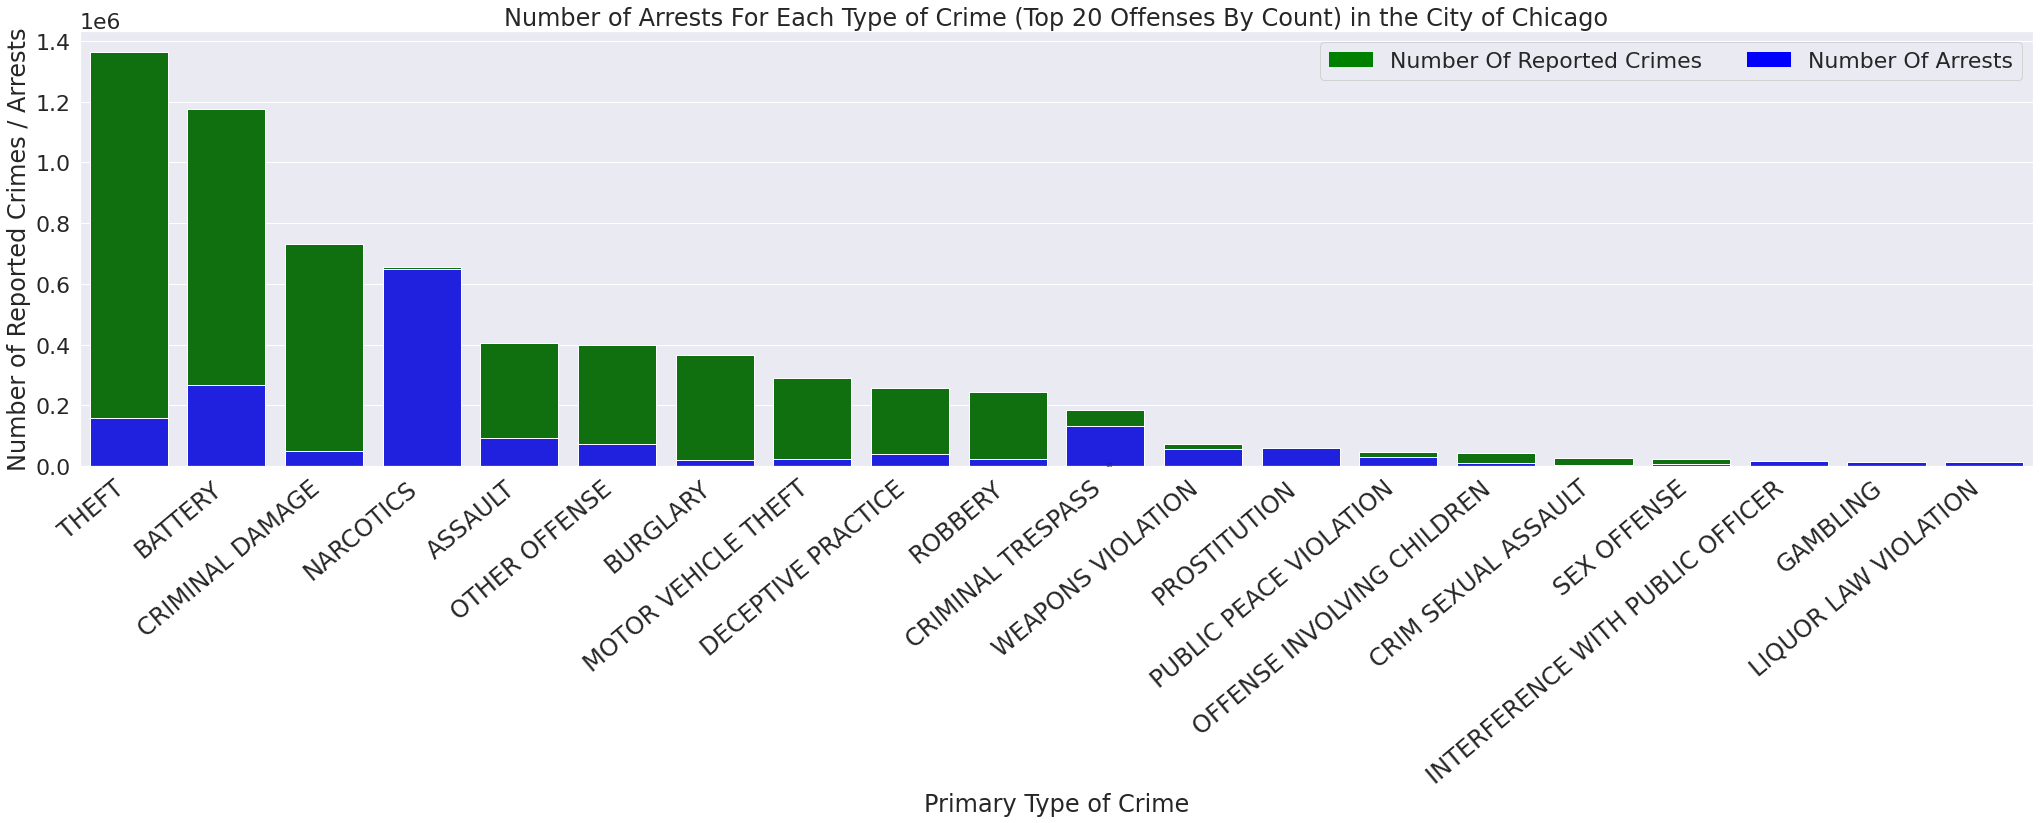

In [ ]:
#create stacked barplot
%matplotlib inline
#figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(35,35))
#plt.subplots_adjust(wspace=0.5,hspace=1.5)
sns.set(font_scale=2)
plt.figure(figsize=(35,8))

#create background bar plot of the number of offenses#create bar plot for primary type of crimes
barplot=sns.barplot(x=arrest_primary_pandas.Primary_Type,y=arrest_primary_pandas.Count_Of_Offenses,data=arrest_primary_pandas,color='green')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=40,horizontalalignment='right',fontsize='medium')

#create the foreground plot
foreground_plot=sns.barplot(x=arrest_primary_pandas.Primary_Type,y=arrest_primary_pandas.Number_of_Arrests,data=arrest_primary_pandas, color='blue')
barplot.set(title='Number of Arrests For Each Type of Crime (Top 20 Offenses By Count) in the City of Chicago',ylabel='Number of Reported Crimes / Arrests',xlabel='Primary Type of Crime')

#Create Legend
background=plt.Rectangle((0,0),1,1, fc='green',edgecolor='none')
foreground=plt.Rectangle((0,0),1,1, fc='blue',edgecolor='none')
legend=plt.legend([background, foreground],['Number Of Reported Crimes', 'Number Of Arrests'],loc=1,ncol=2)

percentages=arrest_primary_pandas['Arrest_Percentage'].tolist()

plt.text(x=10, y=10, s='10',size=6)
plt.show()


As we can see from the stacked barplot above there is correlation between a reported crime and an arrest for that crime for certain infraction types. If a narcotics offense is reported there is almost a 100% chance that an arrest will be made. Criminal trespassing, inference with a public officer, gambling, and liquor law violations also have high arrest rates. This plot gives some insight into how good Chicago law enforcement is at catching criminals (assuming the right person is arrested) for various types of crimes. 

**Arrest Rates In Different Parts of Chicago**

Let's now investigate whether arrest rates differ in different parts of Chicago. We will do this by computing arrest percentages for each community area of Chicago and by visualizing the number of arrests and reported crimes in a plot.

In [ ]:
#Compute arrest rates for each community area
#Compute arrest rate for each type of crime (hardest criminals to catch? inconclusive but type of crime could be a contributing factor)
crimes_sdf.createOrReplaceTempView('crimes_sdf')
query_loc_count=''' SELECT Community_Area_Name, COUNT((CASE WHEN crimes_sdf.Arrest = true THEN crimes_sdf.Arrest END)) AS Number_of_Arrests, COUNT(Community_Area_Name) AS Count FROM crimes_sdf GROUP BY Community_Area_Name ORDER BY Count DESC LIMIT 79 '''

query_primary_type_count_sdf=spark.sql(query_loc_count)
query_primary_type_count_sdf.createOrReplaceTempView('loc_arrests')

arrest_primary_q='''SELECT *, ((loc_arrests.Number_of_Arrests)/ (CAST (loc_arrests.Count AS FLOAT))* 100) AS Arrest_Percentage FROM loc_arrests ORDER By Arrest_Percentage DESC'''

arrest_loc_sdf=spark.sql(arrest_primary_q)

arrest_loc_sdf.show(100,False)

+----------------------+-----------------+------+------------------+
|Community_Area_Name   |Number_of_Arrests|Count |Arrest_Percentage |
+----------------------+-----------------+------+------------------+
|West Garfield Park    |54382            |121035|44.93080513900938 |
|East Garfield Park    |48745            |121608|40.08371159792119 |
|Austin                |160864           |407343|39.49104317491647 |
|Humboldt Park         |78783            |202948|38.81930346689793 |
|North Lawndale        |71802            |186593|38.48054321437567 |
|Douglas               |26641            |71552 |37.23306127012522 |
|Fuller Park           |7891             |21756 |36.270454127596985|
|New City              |44678            |131971|33.85440740768805 |
|Near South Side       |15957            |48514 |32.8915364637012  |
|Uptown                |29542            |93467 |31.60687729359025 |
|Woodlawn              |32367            |104595|30.945073856302884|
|West Englewood        |56194     

Now let's visualize these results in a stacked bar plot as well. 

In [ ]:
#convert to pandas
arrest_loc_pandas=arrest_loc_sdf.toPandas()

#sort the dataframe
arrest_loc_pandas=arrest_loc_pandas.sort_values(by=['Count'],ascending=False).reset_index(drop=True)

#arrest_loc_pandas.head()

Community_Area_Name  Number_of_Arrests   Count  Arrest_Percentage
0              Austin             160864  407343          39.491043
1     Near North Side              59674  222891          26.772727
2         South Shore              50868  210539          24.160844
3       Humboldt Park              78783  202948          38.819303
4      Near West Side              49662  190618          26.053153

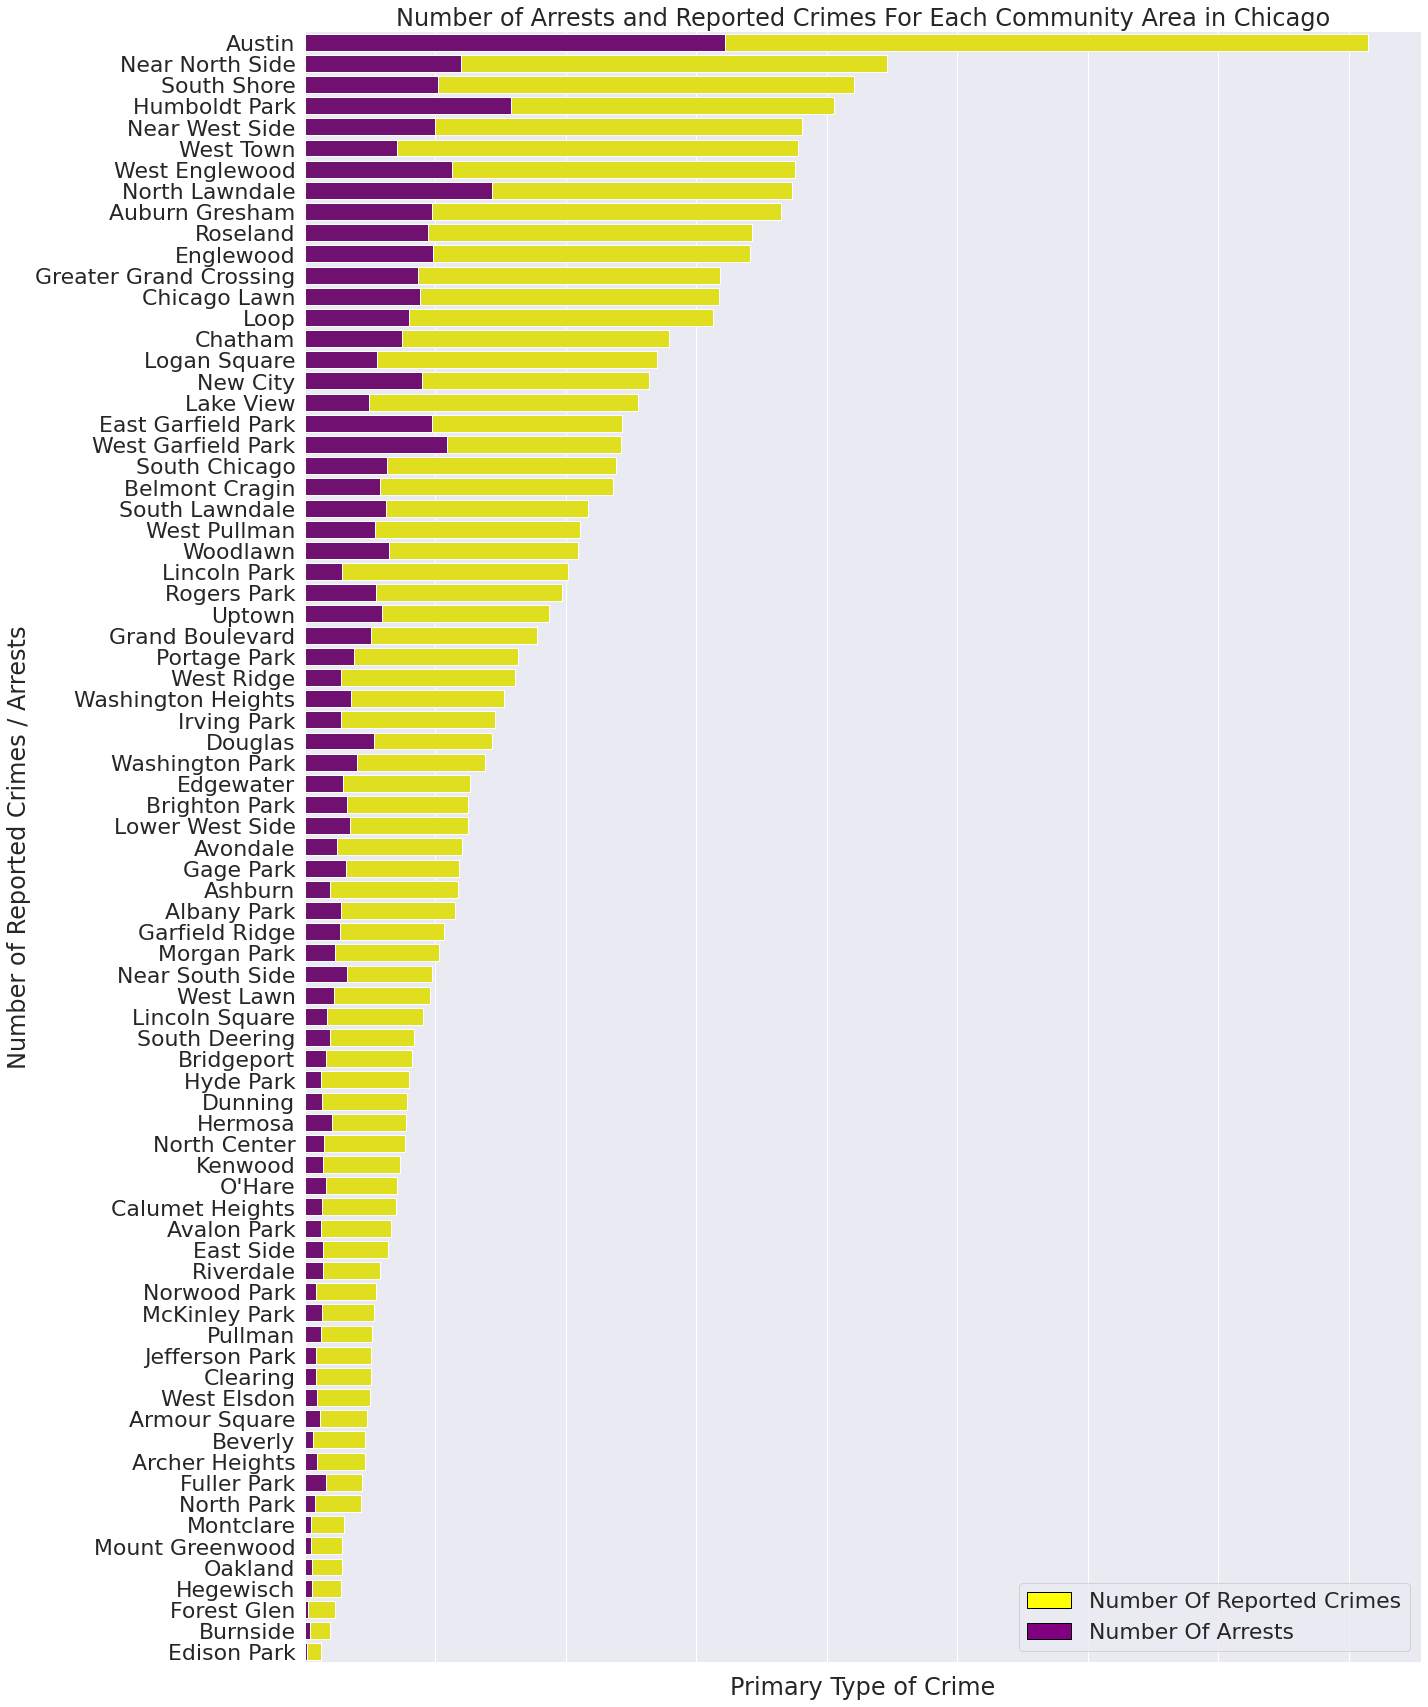

In [ ]:
#create stacked barplot
%matplotlib inline
#figure,axes=plt.subplots(nrows=1,ncols=1,figsize=(35,35))
#plt.subplots_adjust(wspace=0.5,hspace=1.5)
sns.set(font_scale=2)
plt.figure(figsize=(20,30))

#create background bar plot of the number of offenses#create bar plot for primary type of crimes
barplot=sns.barplot(x=arrest_loc_pandas.Count,y=arrest_loc_pandas.Community_Area_Name,data=arrest_loc_pandas,color='yellow')
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='medium')
#barplot.set_xlabel('Count')
#create the foreground plot
foreground_plot=sns.barplot(x=arrest_loc_pandas.Number_of_Arrests,y=arrest_loc_pandas.Community_Area_Name,data=arrest_loc_pandas, color='purple')
barplot.set(title='Number of Arrests and Reported Crimes For Each Community Area in Chicago',ylabel='Number of Reported Crimes / Arrests',xlabel='Primary Type of Crime')
#barplot.set_xlabel(arrest_loc_pandas.Number_of_Arrests)

#Create Legend
background=plt.Rectangle((0,0),1,1, fc='yellow',edgecolor='black')
foreground=plt.Rectangle((0,0),1,1, fc='purple',edgecolor='black')
legend=plt.legend([background, foreground],['Number Of Reported Crimes', 'Number Of Arrests'],loc=4,ncol=1)

sns.despine(left=True, bottom=True)

percentages=arrest_loc_pandas['Arrest_Percentage'].tolist()

As we see in the plot above there the number of arrests generally increases with the number of crimes in a certain area. We can also say that it is much more likely for both a crime and an arrest to happen in areas of Chicago like Austin and the Near North Side compared to Edison Park or Burnside, if we are basing that statement off of counts alone. 

**Time Series and Trend Analysis**

As we continue our EDA, let's now complete some crime trend analysis and plot some time series plots 

In [ ]:
#total crimes each year 
crimes_sdf.createOrReplaceTempView('crimes_sdf')
yr_query=''' SELECT COUNT(ID), Year FROM crimes_sdf GROUP BY Year ORDER BY Year ASC LIMIT 19'''

yr_sdf=spark.sql(yr_query)
yr_df_pandas=yr_sdf.toPandas()

In [ ]:
yr_df_pandas.head()

count(ID)  Year
0       3881  2001
1     345017  2002
2     471986  2003
3     467113  2004
4     449866  2005

We can see that in 2001 there is a very small number of crimes reported. It is not likely that 2001 was just an exceptional year and crime was low. It is more likely that the system used to keep track of crimes only contained part of the data for 2001. So we will drop 2001 from our dataframe. 2020 has also not been included in the plot because we are only part way through 2020 and including it would falsely present a drop in reported crime.

In [ ]:
#Drop first row
yr_df_pandas=yr_df_pandas.iloc[1:]

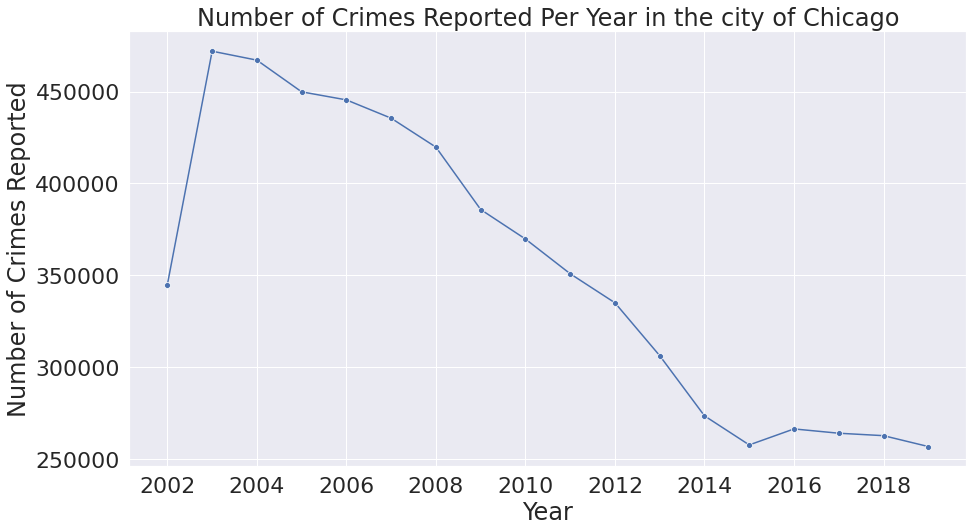

In [ ]:
#year to year crime plot for all the data
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
time_series=sns.lineplot(x='Year', y='count(ID)',marker='o', data=yr_df_pandas)
time_series.set(title='Number of Crimes Reported Per Year in the city of Chicago',ylabel='Number of Crimes Reported',xlabel='Year')
time_series.set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018])

In [ ]:
#Arrest per year plot 
arrest_yr_query='''SELECT COUNT(ID), Year FROM crimes_sdf WHERE Arrest=true GROUP BY Year ORDER BY Year ASC LIMIT 19 '''

arrest_yr_sdf=spark.sql(arrest_yr_query)

#arrest_yr_sdf.show()
#convert to pandas
arrest_yr_panadas=arrest_yr_sdf.toPandas()
arrest_yr_panadas=arrest_yr_panadas.iloc[1:]

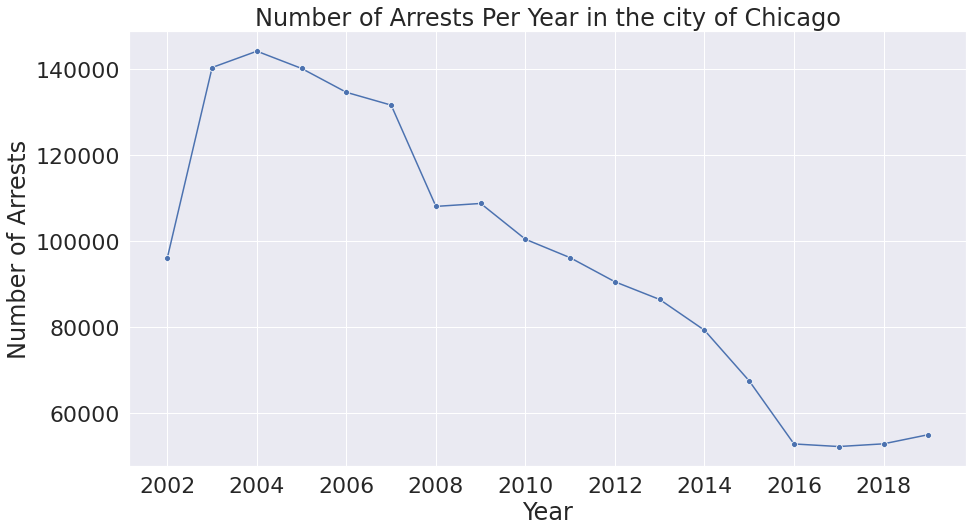

In [ ]:
#Create Plot 
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
time_series=sns.lineplot(x='Year', y='count(ID)',marker='o', data=arrest_yr_panadas)
time_series.set(title='Number of Arrests Per Year in the city of Chicago',ylabel='Number of Arrests',xlabel='Year')
time_series.set_xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018])

We have shown overall time series trends in the number of reported crime and arrests made, but we would like to increase the resolution of our analysis. In order to do so let's plot the time series trend (per year) in reported crimes and arrests in specific community areas to see what's happening in each part of the city of Chicago. 

In [ ]:
#Community Area year over year crime plot for top 20 community areas by reported crimes (big subplot??)

crimes_sdf.createOrReplaceTempView('crimes_sdf')

comm_area_yr_query=''' SELECT COUNT(ID) AS COUNT, Year, Community_Area_Name, COUNT((CASE WHEN crimes_sdf.Arrest = true THEN crimes_sdf.Arrest END)) AS Arrests FROM crimes_sdf WHERE Community_Area_Name LIKE 'Austin%' OR Community_Area_Name LIKE 'Near North Side%' OR Community_Area_Name LIKE 'South Shore%' OR Community_Area_Name LIKE 'Humboldt Park%' OR Community_Area_Name LIKE 'Near West Side%' OR Community_Area_Name LIKE 'West Town%' OR Community_Area_Name LIKE 'West Englewood%' OR Community_Area_Name LIKE 'North Lawndale%' OR Community_Area_Name LIKE 'Auburn Gresham%' OR Community_Area_Name LIKE 'Roseland%' GROUP BY Community_Area_Name, Year''' #incorporate the case when as well

comm_area_yr_sdf=spark.sql(comm_area_yr_query)

comm_area_yr_sdf.createOrReplaceTempView('com_area_1')

#convert to pandas
com_area_yr_pandas=comm_area_yr_sdf.toPandas()


[Text(0, 0, 'Near North Side'),
 Text(0, 0, 'South Shore'),
 Text(0, 0, 'Near West Side'),
 Text(0, 0, 'Auburn Gresham'),
 Text(0, 0, 'Austin'),
 Text(0, 0, 'North Lawndale'),
 Text(0, 0, 'Roseland'),
 Text(0, 0, 'Humboldt Park'),
 Text(0, 0, 'West Englewood'),
 Text(0, 0, 'West Town')]

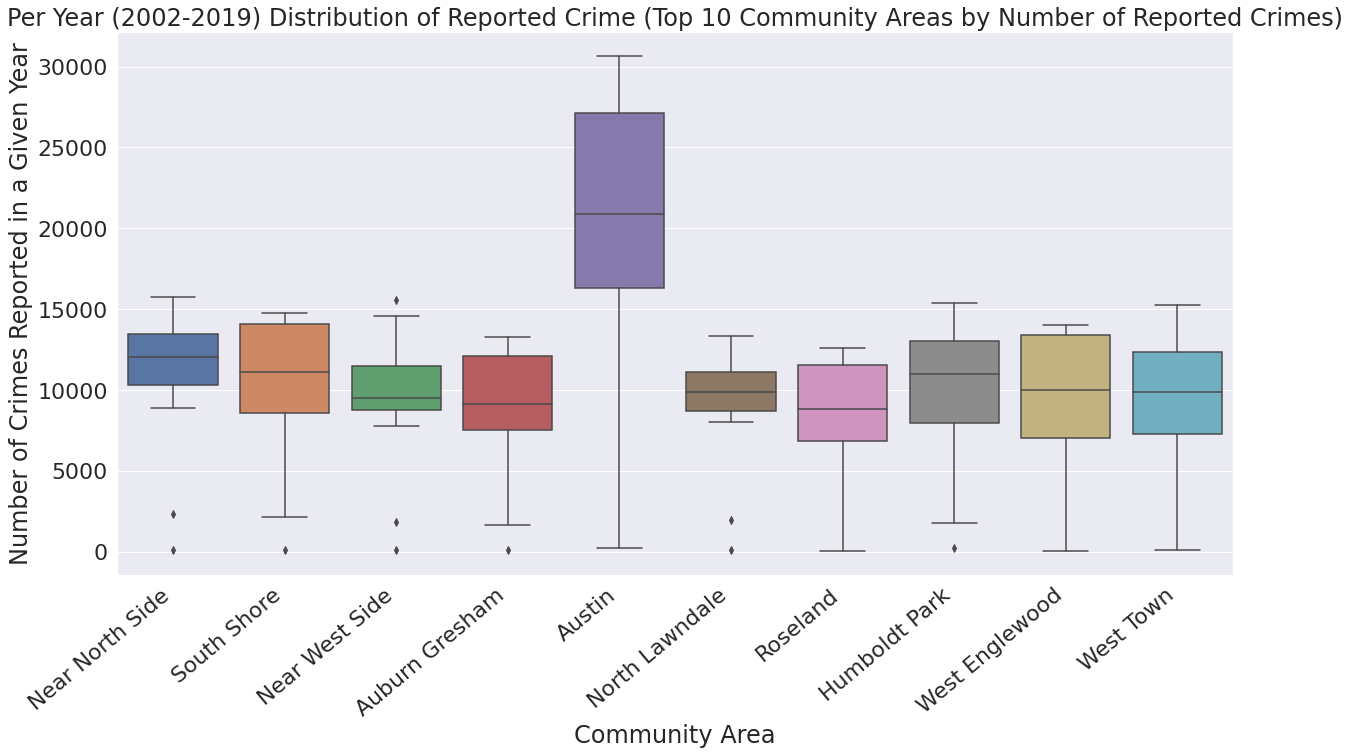

In [ ]:
#make violin / boxplots with community area on the x and number of crimes on the y 
#sns.set(font_scale=2)
plt.figure(figsize=(20,10))
comm_area_yr_boxplot=sns.boxplot(x='Community_Area_Name', y='COUNT', data=com_area_yr_pandas)
comm_area_yr_boxplot.set(title='Per Year (2002-2019) Distribution of Reported Crime (Top 10 Community Areas by Number of Reported Crimes)',ylabel='Number of Crimes Reported in a Given Year',xlabel='Community Area')
comm_area_yr_boxplot.set_xticklabels(comm_area_yr_boxplot.get_xticklabels(),rotation=40,horizontalalignment='right')



Let's make the same plot as above for arrests

[Text(0, 0, 'Near North Side'),
 Text(0, 0, 'South Shore'),
 Text(0, 0, 'Near West Side'),
 Text(0, 0, 'Auburn Gresham'),
 Text(0, 0, 'Austin'),
 Text(0, 0, 'North Lawndale'),
 Text(0, 0, 'Roseland'),
 Text(0, 0, 'Humboldt Park'),
 Text(0, 0, 'West Englewood'),
 Text(0, 0, 'West Town')]

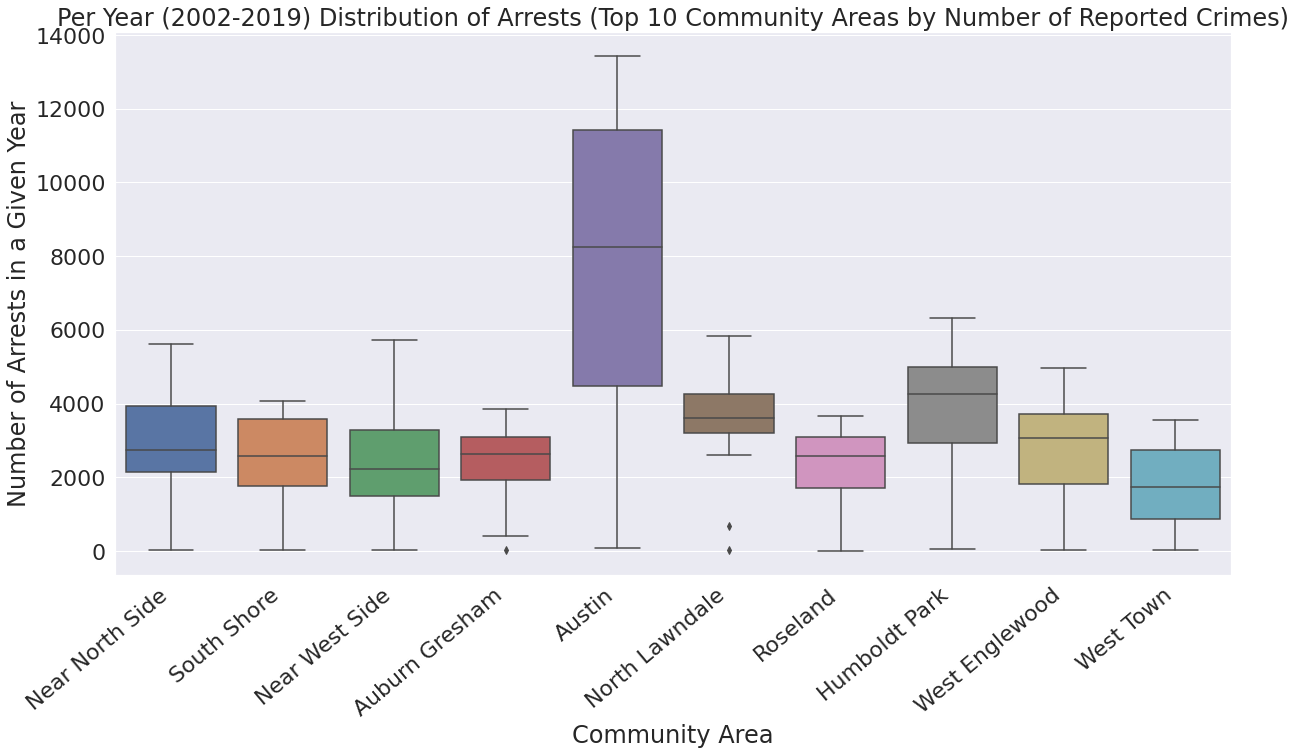

In [ ]:
#same plot for arrests
plt.figure(figsize=(20,10))
comm_area_yr_boxplot=sns.boxplot(x='Community_Area_Name', y='Arrests', data=com_area_yr_pandas)
comm_area_yr_boxplot.set(title='Per Year (2002-2019) Distribution of Arrests (Top 10 Community Areas by Number of Reported Crimes)',ylabel='Number of Arrests in a Given Year',xlabel='Community Area')
comm_area_yr_boxplot.set_xticklabels(comm_area_yr_boxplot.get_xticklabels(),rotation=40,horizontalalignment='right')

From these plots above we can see that the distribution of reported crimes and arrests on a per year basis. We see that there is variance in the distribution of reported crimes and arrests. We also see that the distribution of arrests pretty much follows the distribution of reported crimes. Let's now add line plots that show the number of reported crimes on a per year basis for the 4 community areas above with the most reported crimes.

In [ ]:
#create time series plot for top 10 by count community areas 

#first_q=

q_1='''SELECT * FROM com_area_1 WHERE Community_Area_Name LIKE 'Near North Side%' ORDER BY Year ASC '''
N_N_S_sdf=spark.sql(q_1)
N_N_S_pandas=N_N_S_sdf.toPandas()
q_2='''SELECT * FROM com_area_1 WHERE Community_Area_Name LIKE 'South Shore%' ORDER BY Year ASC '''
South_S_sdf=spark.sql(q_2)
South_S_pandas=South_S_sdf.toPandas()
q_3='''SELECT * FROM com_area_1 WHERE Community_Area_Name LIKE 'Near West Side%' ORDER BY Year ASC '''
N_W_S_sdf=spark.sql(q_3)
N_W_S_pandas=N_W_S_sdf.toPandas()
q_4='''SELECT * FROM com_area_1 WHERE Community_Area_Name LIKE 'Humboldt Park%' ORDER BY Year ASC '''
H_P_sdf=spark.sql(q_4)
H_P_sdf_pandas=H_P_sdf.toPandas()

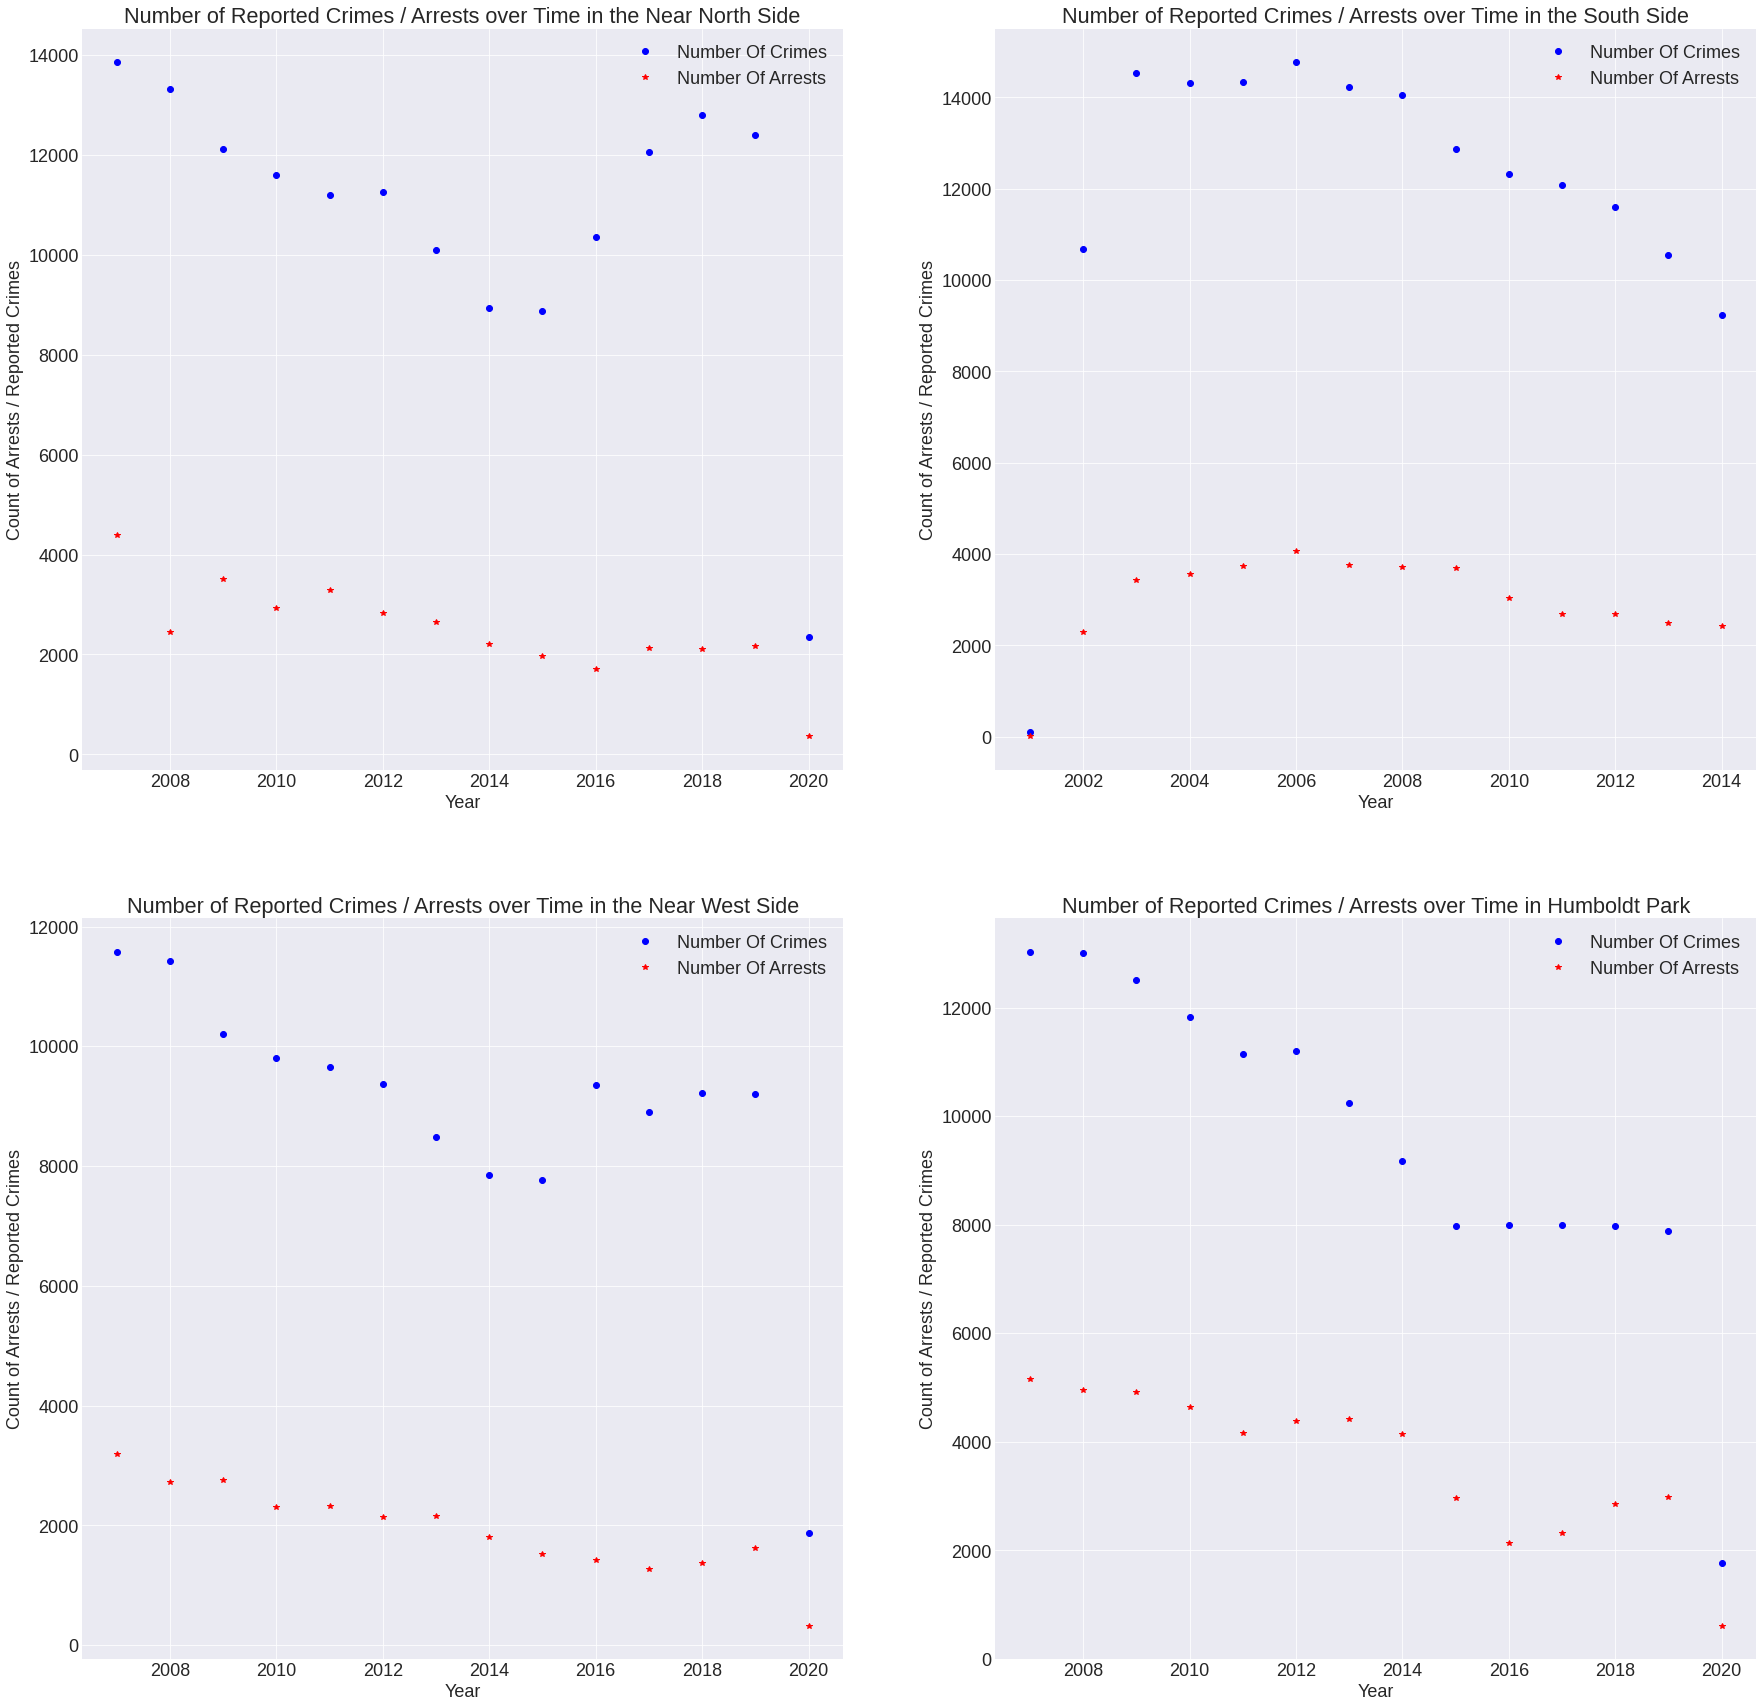

In [ ]:
#Create plots 
#Drop first row
N_N_S_pandas=N_N_S_pandas.iloc[1:]
#drop the last row
South_S_pandas=South_S_pandas.iloc[:-1]
N_W_S_pandas=N_W_S_pandas.iloc[1:]
H_P_sdf_pandas=H_P_sdf_pandas.iloc[1:]
plt.rcParams.update({'font.size':18})
f,axes=plt.subplots(2,2,figsize=(30,30))
plt.subplot(2,2,1)
plt.style.use('seaborn-darkgrid')
pal=plt.get_cmap('Set1')
plt.plot(N_N_S_pandas['Year'],N_N_S_pandas['COUNT'],'bo',label='Number Of Crimes')
plt.plot(N_N_S_pandas['Year'],N_N_S_pandas['Arrests'],'r*',label='Number Of Arrests')
plt.title('Number of Reported Crimes / Arrests over Time in the Near North Side')
plt.xlabel('Year')
plt.ylabel('Count of Arrests / Reported Crimes')
plt.legend(loc='upper right')


plt.subplot(2,2,2)
plt.style.use('seaborn-darkgrid')
pal=plt.get_cmap('Set1')
plt.plot(South_S_pandas['Year'],South_S_pandas['COUNT'],'bo',label='Number Of Crimes')
plt.plot(South_S_pandas['Year'],South_S_pandas['Arrests'],'r*',label='Number Of Arrests')
plt.title('Number of Reported Crimes / Arrests over Time in the South Side')
plt.xlabel('Year')
plt.ylabel('Count of Arrests / Reported Crimes')
plt.legend(loc='upper right')


plt.subplot(2,2,3)
plt.style.use('seaborn-darkgrid')
pal=plt.get_cmap('Set1')
plt.plot(N_W_S_pandas['Year'],N_W_S_pandas['COUNT'],'bo',label='Number Of Crimes')
plt.plot(N_W_S_pandas['Year'],N_W_S_pandas['Arrests'],'r*',label='Number Of Arrests')
plt.title('Number of Reported Crimes / Arrests over Time in the Near West Side')
plt.xlabel('Year')
plt.ylabel('Count of Arrests / Reported Crimes')
plt.legend(loc='upper right')

plt.subplot(2,2,4)
plt.style.use('seaborn-darkgrid')
pal=plt.get_cmap('Set1')
plt.plot(H_P_sdf_pandas['Year'],H_P_sdf_pandas['COUNT'],'bo',label='Number Of Crimes')
plt.plot(H_P_sdf_pandas['Year'],H_P_sdf_pandas['Arrests'],'r*',label='Number Of Arrests')
plt.title('Number of Reported Crimes / Arrests over Time in Humboldt Park')
plt.xlabel('Year')
plt.ylabel('Count of Arrests / Reported Crimes')
plt.legend(loc='upper right')


In the time-series plots above we see that for each of the 4 community areas with the most reported crime the arrests / reported crimes seem to mirror each other.

Let's look at reported crimes per hour of the day. We'll show the hourly distribution of the top two reported crimes, theft and battery below. 


In [ ]:
crimes_sdf.createOrReplaceTempView('crimes_sdf')

hour_query='''SELECT Primary_Type, COUNT(Primary_Type) AS COUNT, hour(Date_Cleaned_Final) as Hour_Of_Day FROM crimes_sdf GROUP BY Hour_Of_Day, Primary_Type ORDER BY COUNT DESC '''

hour_sdf=spark.sql(hour_query)

hour_sdf.show()

#Create plots for top 2 offenses by count, get the top 2 from the graphs above and use the like clause (basically same plot as the community area plot)

hour_sdf.createOrReplaceTempView('hour_sdf')

theft_q='''SELECT * FROM hour_sdf WHERE Primary_Type LIKE 'THEFT%' '''
theft_sdf=spark.sql(theft_q)

batt_q='''SELECT * FROM hour_sdf WHERE Primary_Type LIKE 'BATTERY%' '''
batt_sdf=spark.sql(batt_q)
theft_pandas=theft_sdf.toPandas()
batt_pandas=batt_sdf.toPandas()


+------------+-----+-----------+
|Primary_Type|COUNT|Hour_Of_Day|
+------------+-----+-----------+
|       THEFT|95400|         12|
|       THEFT|85420|         15|
|       THEFT|82915|         17|
|       THEFT|82059|         18|
|       THEFT|81096|         16|
|       THEFT|80709|         14|
|       THEFT|76246|         13|
|       THEFT|75268|          0|
|       THEFT|72123|         19|
|       THEFT|70489|          9|
|     BATTERY|66909|         22|
|     BATTERY|66372|         21|
|     BATTERY|64480|         15|
|     BATTERY|64383|         20|
|       THEFT|64299|         20|
|     BATTERY|63247|         23|
|       THEFT|63174|         11|
|       THEFT|63094|         10|
|     BATTERY|62518|         19|
|     BATTERY|60602|         18|
+------------+-----+-----------+
only showing top 20 rows



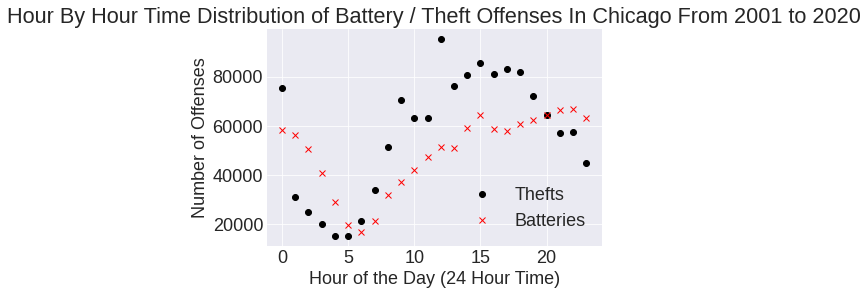

In [ ]:
#create plot
plt.plot(theft_pandas['Hour_Of_Day'],theft_pandas['COUNT'],'ko',label='Thefts')
plt.title('Hour By Hour Time Distribution of Battery / Theft Offenses In Chicago From 2001 to 2020')
plt.xlabel('Hour of the Day (24 Hour Time)')
plt.ylabel('Number of Offenses')
plt.plot(batt_pandas['Hour_Of_Day'],batt_pandas['COUNT'],'rx',label='Batteries')
plt.legend(loc='best')




So we see in the plot above that both batteries and thefts tend to occur more during night time and less in the early morning. This is interesting and we will investigate the potential relationship between crimes and time of day in the next section.

#**Section 3:** **Statistical Testing**

**Statistical Testing: Is the number of reported crimes from 2001-2010 statistically different from 2011-2020?**

We have seen from our time series plots that there is a downward trend in crime in Chicago over the last 18 years. Let's do a Welch's t-test to determine if the mean of the number of reported crimes and the number of reported arrests from the previous decade, 2001-2010, is statistically different than the mean of the number of reported crimes and arrests (respectively) from the following decade, 2011-2020. Let's specify our significance level (alpha) to be the widely accepted value of 0.05.

How about at a community area level

Week to week level?

In [ ]:
#get the data 
decade_1_query=''' SELECT COUNT(ID) AS COUNT, Year FROM crimes_sdf WHERE crimes_sdf.Year BETWEEN 2001 AND 2010 GROUP BY Year'''
decade_2_query=''' SELECT COUNT(ID) AS COUNT, Year FROM crimes_sdf WHERE crimes_sdf.Year BETWEEN 2011 AND 2020 GROUP BY YEar'''
decade_1_sdf=spark.sql(decade_1_query)
decade_2_sdf=spark.sql(decade_2_query)
decade_1_pandas=decade_1_sdf.toPandas()
decade_2_pandas=decade_2_sdf.toPandas()

In [ ]:
#perform t test comparing the mean number of crimes from 2001 to 2010 and 2011 to 2020
from scipy import stats
#convert data to numpy arrays
dec_1_array=decade_1_pandas['COUNT'].to_numpy()
dec_2_array=decade_2_pandas['COUNT'].to_numpy()
#calculate variances
dec_1_var=np.var(dec_1_array)
dec_2_var=np.var(dec_2_array)
print(dec_1_var)
print(dec_2_var)

##We see the variances of the two arrays are different so we specify that in our test####
#run the test 
stats.ttest_ind(dec_1_array,dec_2_array, equal_var=False)

17270934214.159996
5734188318.8


Ttest_indResult(statistic=2.300793068636634, pvalue=0.036843872275512515)

Awesome, so we see from the output of the cell above that our p-value is equal to 0.0368, which is less than our significance level of 0.05. Thus we can conclude that the mean number of reported crimes , contigent upon the fact that the assumptions we made when performing this test are true. 

**Statistical Testing: Is Crime Seasonal?**

There are many articles online about how crime increases when temperatures increase. See one here: https://nypost.com/2019/06/18/high-temperatures-can-lead-to-more-violent-crime-study-finds/ . Let's see if thats really true for our dataset. 

Lets know compare whether there is a statistical difference in the number of reported crimes during the summer season versus the rest of the year using a Welch's t-test. Let's define the summer months to be June through August (inclusive). 

In [ ]:
#First add an hour and month column to our data frame
crimes_sdf.createOrReplaceTempView('crimes_sdf')
query_add_hr_mnth=''' SELECT *, hour(Date_Cleaned_Final) AS Hour_Of_Day, month(Date_Cleaned_Final) AS Month_Of_Year FROM crimes_sdf'''
crimes_sdf_2=spark.sql(query_add_hr_mnth)
#crimes_sdf_2.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+---------------------------+-------------------+-----------+-------------+
|      ID|Case_Number|               Date|               Block|IUCR|        Primary_Type|         Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|          Updated_On|    Latitude|    Longitude|            Location| Date_Cleaned_Final|Community_Area_Numeric_Code|Community_Area_Name|Hour_Of_Day|Month_Of_Year|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+---------

In [ ]:
#Now grab the data that we want 
crimes_sdf_2.createOrReplaceTempView('crimes_sdf_2')
non_summer_query=''' SELECT Month_Of_Year, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Month_of_Year BETWEEN 6 AND 8 GROUP BY Month_Of_Year'''
summer_query='''SELECT Month_Of_Year, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Month_of_Year BETWEEN 1 AND 5 GROUP BY Month_Of_Year UNION SELECT Month_Of_Year, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Month_of_Year BETWEEN 9 AND 12 GROUP BY Month_Of_Year'''
non_summer_pandas=spark.sql(summer_query).toPandas()
summer_pandas=spark.sql(non_summer_query).toPandas()



In [ ]:
#compute the t-test
non_summer_array=non_summer_pandas['COUNT'].to_numpy()
summer_array=summer_pandas['COUNT'].to_numpy()
#calculate variances
non_summer_var=np.var(non_summer_array)
summer_var=np.var(summer_array)
print(non_summer_var)
print(summer_var)

##We see the variances of the two arrays are different so we specify that in our test####
#run the test 
stats.ttest_ind(non_summer_array,summer_array, equal_var=False)


2018192988.0
151623121.55555558


Ttest_indResult(statistic=-4.312192803027814, pvalue=0.001553214655130398)

From our results above we see that it appears the mean number of crimes in the non summer months (January-May and September-December) is statistically different than the mean number of crimes in the summer months (June-August). This is because our p-value is 0.00155 which is below our significance level of alpha = 0.05. Thus, the articles and studies online would be in agreement with the data in our Chicago crime dataset we are analyzing here.

**Statistical Testing: Does More Crime Happen During the Middle of the Night?**

We have just investigated claims regardings trends in the seasonality of crime. There is also a sentiment in the public that crime is more likely to happen in the middle of the night. Let's define the "middle of the night" to be the hours of the day between 11 PM and 4 AM. Let's investigate with a Welch's t-test whether the means of the 

In [ ]:
#grab the data we want 
non_night_q=''' SELECT Hour_Of_Day, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Hour_Of_Day BETWEEN 5 AND 22 GROUP BY Hour_Of_Day'''
night_q='''SELECT Hour_Of_Day, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Hour_Of_Day BETWEEN 23 AND 24 GROUP BY Hour_Of_Day UNION SELECT Hour_Of_Day, COUNT(ID) AS COUNT FROM crimes_sdf_2 WHERE Hour_Of_Day BETWEEN 0 AND 4 GROUP BY Hour_Of_Day '''
non_night_pandas=spark.sql(non_night_q).toPandas()
night_pandas=spark.sql(night_q).toPandas()


In [ ]:
#compute the t-test
non_night_array=non_night_pandas['COUNT'].to_numpy()
night_array=night_pandas['COUNT'].to_numpy()
#calculate variances
#non_night_var=np.var(non_night_array)
#night_var=np.var(night_array)
#print(non_night_var)
#print(night_var)

##We see the variances of the two arrays are different so we specify that in our test####
#run the test 
stats.ttest_ind(non_night_array,night_array, equal_var=False)

Ttest_indResult(statistic=1.7798150625456528, pvalue=0.11149841816596892)

**Investigating Our Underlying Statistical Assumptions**

When performing the above statistical tests we made the assumption that both of our data arrays used for a particular Welch's t-test are normally distributed (we did not, however, assume equal variances as a Welch's t-test was used). We can't say for sure that our data is normally distributed, so let's use a test called the Shapiro-Wilk test to see if each of our groups are normally distributed. The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. Thus, if we obtain a p-value less than our chosen significance level (we will use alpha =0.05 here as well) then we can say data is not normally distributed (according to the Shapiro-Wilk test). Let's see if our normality assumption holds.

In [ ]:
#shapiro wilkes test for normality

#run this test on each of the groups in the 3 analyses above
t_1=stats.shapiro(dec_1_array)
t_2=stats.shapiro(dec_2_array)
t_3=stats.shapiro(non_summer_array)
t_4=stats.shapiro(summer_array)
t_5=stats.shapiro(non_night_array)
t_6=stats.shapiro(night_array)

print(t_1[1])
print(t_2[1])
print(t_3[1])
print(t_4[1])
print(t_5[1])
print(t_6[1])

0.00019278541731182486
0.002727366518229246
0.6522241234779358
0.40978097915649414
0.0016413286793977022
0.6966842412948608


As we see above, unfortunately three of the arrays we used to compute our Welch's t-tests have p-values that are less than 0.05, thus we conclude those data arrays are not normally distributed under the Shapiro-Wilks test. This is not suprising, it is farily rare that data follow normal distributions (despite a common insistence to use tests that do assume normality). So, we conclude our results above above may not be that meaningful for the tests regarding whether crimes happen more in the summer months and whether more crime occurs in the middle of the night.

However, we could retest our hypothesis by using a non-parametric test (namely the Mann-Whitney U test), which will not assume our data is normally distributed. This would be an avenenue for future development as we will move onto to prepping the data for machine learning now.

#**Section 4:** **Getting Ready for Predictive Modeling and Machine Learning**

So far we have done some exploratory data analysis investigating the makeup of our dataset. We would like to build a few machine learning models in this section of our annotated notebook. They are as follows: first, we would like to build a model that uses the previous crime data that we have access to in order to predict how many arrests will occur in our testing set, one that predicts how many crimes will occur in the community area of Austin, Chicago, and one that predicts how many thefts will occur in the community area called the Near North Side.

**Preparing for Machine Learning: Spark in Sharded Architecture**

Our dataset is large (over 6 million rows), so we will need to use a sharded archiecture on AWS EMR in order to train machine learning models and make predictions with these models. There are too many computations inherent in training a model on this large of a dataset (even after a 70% training 30% testing data split is performed) a for a single machine to do with an acceptable running time. So now let's set up Spark in a sharded architecture.

The first thing to do is create an S3 bucket so that our dataset doesn't reside on a local machine and instead lives in the cloud. This way it can be accessed across compute nodes. This has been completed on the AWS console. The first part of this will be the same as above (sadly) just because we need to clean up the data and prep it again (however we were able to save money and AWS credits by waiting until now when sharded computation was needed to use it!)  


In [ ]:
#Connect to Amazon AWS EMR

#Input the Master Public DNS 

#DNS must be changed for each new cluster instance
%spark add -s my_session -l python -u http://ec2-54-196-111-197.compute-1.amazonaws.com:8998

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [ ]:
%%spark
#load data into spark 
raw_crimes_sdf = spark.read.format('csv').options(inferSchema=True,header=True).load('s3://finalproject545/Crimes_-_2001_to_present.csv')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#drop the null values again 
raw_crimes_sdf=raw_crimes_sdf.dropna()
#clean up the datatypes again
import pyspark.sql.functions as f
from pyspark.sql.functions import from_unixtime, unix_timestamp, col
crimes_sdf=raw_crimes_sdf
crimes_sdf=crimes_sdf.withColumnRenamed("Primary Type", "Primary_Type")
crimes_sdf=crimes_sdf.withColumnRenamed("Case Number", "Case_Number")
crimes_sdf=crimes_sdf.withColumnRenamed("Location Description", "Location_Description")
crimes_sdf=crimes_sdf.withColumnRenamed("Community Area", "Community_Area")
crimes_sdf=crimes_sdf.withColumnRenamed("FBI Code", "FBI_Code")
crimes_sdf=crimes_sdf.withColumnRenamed("X Coordinate", "X_Coordinate")
crimes_sdf=crimes_sdf.withColumnRenamed("Y Coordinate", "Y_Coordinate")
crimes_sdf=crimes_sdf.withColumnRenamed("Updated On", "Updated_On")

crimes_sdf.createOrReplaceTempView('crimes_sdf')

#drop the bad date column
#crimes_sdf=crimes_sdf.drop("Date")
crimes_sdf= crimes_sdf.withColumn('Date', from_unixtime(unix_timestamp(col(('Date')), "MM/dd/yyyy hh:mm:ss aa"), "yyyy-MM-dd HH:mm:ss"))

crimes_sdf.createOrReplaceTempView('crimes_sdf')

date_time_query_1='''SELECT crimes_sdf.*, to_timestamp(crimes_sdf.Date, 'yyyy-MM-dd HH:mm:ss') AS Date_Cleaned_Final from crimes_sdf'''

#to get the hour: 
#hour(to_timestamp(crimes_sdf_1.Date, 'yyyy-MM-dd HH:mm:ss'))
crimes_sdf=spark.sql(date_time_query_1)

crimes_sdf.show(20,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----------+-------------------+---------------------+----+--------------------------+-------------------------------------------------+---------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+-------------------+
|ID      |Case_Number|Date               |Block                |IUCR|Primary_Type              |Description                                      |Location_Description             |Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|Updated_On            |Latitude    |Longitude    |Location                     |Date_Cleaned_Final |
+--------+-----------+-------------------+---------------------+----+--------------------------+-------------------------------------------------+---------------------------------+------+--------+----+--------+----+--------------+--------+------------+------

Note: We don't need to webscrape and join the community names again because we already have that information in the community area numeric codes already which is all the machine learning algorithms we will use need.

**Getting Ready For Modeling and Machine Learning: Feature Engineering, One Hot Encoding, Vectorization**

We now have our cleaned up dataframe loaded from an Amazon S3 bucket and computed on via Apache Spark in a sharded architecture. We now need to finish preparing our data for machine learning. Namely, lets first add columns encoding datetime information (month, week of the year from 1 to 52, day of month, hour, minute) and change certain columns to numeric types. After this is complete lets drop all non-numeric columns and columns that don't contribute meaningful features for our classifers.

In [ ]:
%%spark
from pyspark.sql import functions
crimes_sdf.createOrReplaceTempView('crimes_sdf')

#queries for creating the desired date-time columns (we already have year)
query_month=''' SELECT ID, month(Date_Cleaned_Final) AS Month, day(Date_Cleaned_Final) AS Day, hour(Date_Cleaned_Final) AS Hour, minute(Date_Cleaned_Final) AS Minute FROM crimes_sdf'''
month_sdf=spark.sql(query_month)

#create the view
month_sdf.createOrReplaceTempView('month_sdf')

#Compute the join
join_month_query='''SELECT * FROM crimes_sdf JOIN month_sdf ON crimes_sdf.ID=month_sdf.ID'''
joined_month_sdf=spark.sql(join_month_query)
joined_month_sdf.createOrReplaceTempView('inter_1')

#extract week of year and add it to the dataframe as an int 
joined_month_sdf=joined_month_sdf.withColumn('week_of_year',functions.weekofyear(joined_month_sdf.Date_Cleaned_Final))

joined_month_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------+-------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----+-----+---+----+------+------------+
|  ID|Case_Number|               Date|               Block|IUCR|Primary_Type|        Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|Year|          Updated_On|    Latitude|    Longitude|            Location| Date_Cleaned_Final|  ID|Month|Day|Hour|Minute|week_of_year|
+----+-----------+-------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+----+-----+---+----+------+

In [ ]:
%%spark 
from pyspark.sql.types import DoubleType

#convert columns to numeric data types
cleaned_sdf=joined_month_sdf.withColumn('IUCR', joined_month_sdf['IUCR'].cast(DoubleType()))
cleaned_sdf.dtypes

#drop columns
cleaned_sdf=cleaned_sdf.drop('ID')
cleaned_sdf=cleaned_sdf.drop('Case_Number')
cleaned_sdf=cleaned_sdf.drop('Block')
cleaned_sdf=cleaned_sdf.drop('Description')
cleaned_sdf=cleaned_sdf.drop('Updated_On')
cleaned_sdf=cleaned_sdf.drop('Location')
cleaned_sdf=cleaned_sdf.drop('Date_Cleaned_Final')
cleaned_sdf=cleaned_sdf.drop('ID')
cleaned_sdf=cleaned_sdf.drop('Date')
cleaned_sdf=cleaned_sdf.drop('FBI_Code')
cleaned_sdf.dtypes

cleaned_sdf.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+
|110.0|    HOMICIDE|              STREET| false|   false| 414|       4|   8|            46|     1191956|     1850663|2001|41.745206763|-87.572213565|    5| 18|  11|    57|          20|
|110.0|    HOMICIDE|              STREET| false|   false| 713|       7|  16|            67|     1167611|     1867966|2001|41.793244724|-87.660921628|    9| 10|  11|     2|          37|
|110.0|    HOMICIDE|              STREET|  true|   false|1533|      15|  28

**More Data Prep: String Indexing and One-Hot Encoding**

We now need to convert categorical data to numeric using one-hot encoding. This needs to be done for the Primary Type and Location Description columns.

In [ ]:
%%spark
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.feature import StringIndexer

#use string_indexer to convert strings to numeric labels
str_indexer=StringIndexer(inputCol='Primary_Type',outputCol='Primary_Type_Index')#convert the Primary Type column
indexed_sdf=str_indexer.fit(cleaned_sdf).transform(cleaned_sdf)
str_indexer_2=StringIndexer(inputCol='Location_Description',outputCol='Loc_Desc_Index')#convert the Location Description column
indexed_sdf_final=str_indexer_2.fit(indexed_sdf).transform(indexed_sdf)
indexed_sdf_final.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+
|110.0|    HOMICIDE|              STREET| false|   false| 414|       4|   8|            46|     1191956|     1850663|2001|41.745206763|-87.572213565|    5| 18|  11|    57|          20|              21.0|           0.0|
|110.0|    HOMICIDE|              STREET| false|   false| 713|       7|  16|            67|     1167611|     1867966|2001|41

**Labeling: Spark UDFs**

We woud like to create three machine learning models. In order to do so we need to create Spark UDFs (user-defined functions) to place a number 1 in rows that are on-target and a number 0 in rows that are off target for each of the three models. We will need two UDFs, one for labeling crimes that occured in Austin in the training set and one for labeling crimes that were thefts in the Near North Side in the training set. The arrest model label can be created by converting the Arrest column from boolean to float. So, we are labeling the columns in this section. Each model is a binary classifier.  

In [ ]:
%%spark
from pyspark.sql.functions import udf
from pyspark.sql.types import *

#define udf to create the homicide labels and register it 
def set_value(value):
  value=float(value)
  if value == 21:
    return 1
  else:
    return 0
#register the udf
spark.udf.register('SET_VALUE', set_value, StringType())


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function set_value at 0x7f3d181b4048>

In [ ]:
%%spark 
#define udf to define the labels for predicting the number of crimes in Austin Community Area
#number is 25

def find_austin(value):
  value=float(value)
  if value == 25:
    return 1
  else: 
    return 0
#register the udf
spark.udf.register('FIND_AUSTIN', find_austin, StringType())



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function find_austin at 0x7f3d181a1c80>

In [ ]:
#to get the index number for the UDF
%%spark 
indexed_sdf_final.createOrReplaceTempView('indexed_sdf_final')
find_theft_q='''SELECT * FROM indexed_sdf_final WHERE Primary_Type LIKE 'THEFT%' '''
found_theft=spark.sql(find_theft_q).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+
|810.0|       THEFT|     VACANT LOT/LAND| false|   false| 524|       5|  34|            53|     1172623|     1827827|2002|41.682988868|-87.643722561|    2| 17|  15|     0|           7|               0.0|          28.0|
|820.0|       THEFT|               OTHER| false|   false|1924|      19|  44|             6|     1165075|     1921756|2002|41

In [ ]:
%%spark 
from pyspark.sql.functions import struct
#define first udf to define the labels for predicting Near North Side

def find_near_north_side_thefts(Primary_Type_Index,Community_Area):
  if Primary_Type_Index == 0 and Community_Area ==8:
    return 1
  else:
    return 0
#register the udf 
spark.udf.register('FIND_NNS_THEFT', find_near_north_side_thefts, StringType())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function find_near_north_side_thefts at 0x7f3d181a1950>

Now that we have our labeling UDFs lets create their respective columns in the spark data frame. 

In [ ]:
%%spark 
indexed_sdf_final.createOrReplaceTempView('indexed_final')
#add all the necessary labels to the matrix before one-hot encoding it
create_labels_query='''SELECT *, SET_VALUE(Primary_Type_Index) AS Homicide_label, FIND_AUSTIN(Community_Area) AS Austin_label, FIND_NNS_THEFT(Primary_Type_Index,Community_Area) AS NNS_theft_label FROM indexed_final'''
labeled_sdf_final=spark.sql(create_labels_query)
labeled_sdf_final.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+
|110.0|    HOMICIDE|              STREET| false|   false| 414|       4|   8|            46|     1191956|     1850663|2001|41.745206763|-87.572213565|    5| 18|  11|    57|          20|              21.0|        

As we can see in the preview of the spark dataframe above we have added columns with 1s where the conditions defined in our UDFs are true. Lets now one-hot encode the columns in our dataframe that are strings.

In [ ]:
%%spark
#Perform the One-Hot Encoding on the specified columns
encoder=OneHotEncoderEstimator(inputCols=['Primary_Type_Index','Loc_Desc_Index'],outputCols=['Primary_Type_Vec', 'Loc_Desc_Vec'])

model=encoder.fit(labeled_sdf_final)
encoded_sdf=model.transform(labeled_sdf_final)
encoded_sdf.show()

#drop the columns we don't want to use in the vector assembler 


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|     Loc_Desc_Vec|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+
|110.0|    HOMICIDE|              STREET| false|   false| 414|       4|   8|            46|     1191956|  

There is one more data wrangling task we have to do before proceeding to our vector assembler, which is to convert the Arrest type to numeric (it is currently boolean) in order for ML algorithms to be able to intrepret it. Let's do that now. 

In [ ]:
%%spark
#create test and training sets 
encoded_sdf.createOrReplaceTempView('encoded_sdf')

encoded_sdf_cleaned_q='''SELECT *, FLOAT(Arrest) AS Arrest_label FROM encoded_sdf '''
encoded_sdf_cleaned=spark.sql(encoded_sdf_cleaned_q)
encoded_sdf_cleaned.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|     Loc_Desc_Vec|Arrest_label|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+
|110.0|    HOMICIDE|              STREET| false|   false| 414|     

In [ ]:
%%spark
#create list of all columns
all_col_list=['IUCR','Primary_Type','Location_Description','Arrest','Domestic', 'Beat', 'District','Ward','Community_Area','X_Coordinate','Y_Coordinate','Year','Latitude','Longitude','Month','Day','Hour','Minute','week_of_year','Primary_Type_Index','Loc_Desc_Index','Homicide_label','Austin_label','NNS_theft_label','Primary_Type_Vec','Loc_Desc_Vec','Arrest_label']
#create list of columns we want to drop (the non-numeric columns and the label columns)
drop_col_list=['Primary_Type','Location_Description','Arrest','Primary_Type_Index','Loc_Desc_Index','Homicide_label','Austin_label','NNS_theft_label','Arrest_label']

#drop the columns in the drop column list
feature_cols_models=[i for i in all_col_list if i not in drop_col_list]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Vector Assembler**

We need to combine all of our feature columns into one column composed of feature vectors so the the Spark MLLib ML models can be run on the feature data. Let's do that now.

In [ ]:
%%spark
from pyspark.ml.feature import VectorAssembler
#create vector assembler
assembler=VectorAssembler(inputCols=feature_cols_models, outputCol='model_features')
#run the assembler on the dataset. skip any null values (however they should have been dropped)
modified_encoded_final=assembler.setHandleInvalid('skip').transform(encoded_sdf_cleaned)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
modified_encoded_final.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|     Loc_Desc_Vec|Arrest_label|      model_features|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------------+
|110

Let's now create training and testing sets from our spark dataframe. As noted above, the testing set will be data from years 2017, 2018, 2019, and 2020 and the training data will be data from years 2001-2016.

In [ ]:
%%spark
#create test and training sets 
modified_encoded_final.createOrReplaceTempView('modified_encoded_final')

training_set_query='''SELECT * FROM modified_encoded_final WHERE Year <=2016'''
testing_set_query='''SELECT * FROM modified_encoded_final WHERE Year >=2017'''
training_set_sdf=spark.sql(training_set_query)
testing_set_sdf=spark.sql(testing_set_query)
training_set_sdf.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|     Loc_Desc_Vec|Arrest_label|      model_features|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------------+
|110

#**Section 5:** **Predictive Modeling and Machine Learning On a Sharded Architecture Using Apache Spark**

**The First Supervised Model: Predicting Yearly Number of Arrests With A Random Forest Classifier**

The first model we would like to build is one that predicts the number of arrests that will occur in the test set. Our test set will be data from 2017-2019, and our training set will be data from 2000-2016. This split will be the same for all models built. Giving Chicago Law Enforcement a prediction for how many criminals they can expect to catch not only helps to allocate resources in the judicial system, but also gives a citizen in the general public an idea of how likely they are to get justice if a crime is committed against that citizen in a given year.

In [ ]:
%%spark 

#prepare the training and testing sets
training_set_sdf.createOrReplaceTempView('training_set_arrests')
rename_theft_NNS_q='''SELECT FLOAT(Arrest_label) AS label, model_features AS features FROM training_set_arrests'''
arrest_train_sdf=spark.sql(rename_theft_NNS_q)
testing_set_sdf.createOrReplaceTempView('testing_set')
rename_theft_NNS_q='''SELECT FLOAT(Arrest_label) AS label, model_features AS features FROM testing_set'''
arrest_sdf_testing=spark.sql(rename_theft_NNS_q)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
from pyspark.ml.classification import RandomForestClassifier
#create the rf model with 10 trees
rf_arrests_1=RandomForestClassifier(labelCol='label', featuresCol='features',numTrees=10)
#train the random forest model
model_rf_arrests_1=rf_arrests_1.fit(arrest_train_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#make predictions
arrest_predictions=model_rf_arrests_1.transform(arrest_sdf_testing)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#compute accuracies 
arrest_sdf_testing.createOrReplaceTempView('testing_set_sdf')
arrest_predictions.createOrReplaceTempView('arrest_predictions')
find_arrests='''SELECT COUNT(prediction) FROM arrest_predictions WHERE prediction = 1'''
find_arrests_sdf=spark.sql(find_arrests)
total_true_arrests_q='''SELECT COUNT(Arrest) FROM testing_set_sdf WHERE label=1'''
find_arrests_sdf.show()
total_true_arrests=spark.sql(total_true_arrests_q).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|count(prediction)|
+-----------------+
|            51083|
+-----------------+

+-------------+
|count(Arrest)|
+-------------+
|       152685|
+-------------+

The first results are in. So this model predicted that there would be 51083 arrest from 2017-2020 when in fact there were 152685, thus this model had an accuracy of 33.46% on the testing set. 33.46% of the instances provided were labeled as positive for an arrest . So, we can see that where a crime occured, the type of crime that occured, and the time that it occured is somewhat predictive of whether an arrest will be made for that offense. Let's see if can improve our model.

**Optimizing Our Random Forest Model: Hyperparamter Tuning and Cross-Validation**

We can try to improve our accuracy on the test set by performing cross-validation and tuning hyperparameters with grid search. Let's do this now.  

In [ ]:
%%spark

from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
#tune hyperparameters for the random forest model 
rf_arrests=RandomForestClassifier(labelCol='label', featuresCol='features')
#create the parameter grid
paramGrid=ParamGridBuilder().addGrid(rf_arrests_1.numTrees,[8,16,24]).addGrid(rf_arrests_1.maxDepth,[5,10,15]).build()
#cross validate the model 
crossvaldiation_arrests_1=CrossValidator(estimator=rf_arrests,estimatorParamMaps=paramGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)
cv_rf_arrests_1_model=crossvaldiation_arrests_1.fit(arrest_train_sdf)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark 

#make predictions with cross-validated model 
predictions_arrests_cv=cv_rf_arrests_1_model.transform(arrest_sdf_testing)
#predictions_arrests_cv.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#compute accuracy
#testing_set_sdf.createOrReplaceTempView('testing_set_sdf')
arrest_sdf_testing.createOrReplaceTempView('testing_sdf_arrest')
predictions_arrests_cv.createOrReplaceTempView('arrests_cv')
find_arrests='''SELECT COUNT(prediction) AS pred_num_arrests FROM arrests_cv WHERE arrests_cv.prediction = 1'''
find_arrests_sdf=spark.sql(find_arrests)
total_true_arrests_q='''SELECT COUNT(label) FROM testing_sdf_arrest WHERE label=1'''
find_arrests_sdf.show()
total_true_arrests=spark.sql(total_true_arrests_q).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+
|pred_num_arrests|
+----------------+
|           51477|
+----------------+

+------------+
|count(label)|
+------------+
|      152685|
+------------+

So, as shown above we see that cross validating our model and using a grid search to optimize hyperparameters has resulted in an increase in accuracy in the testing set. Specifically, our accuracy is now equal to 33.71% (increased from 33.46%). It is important to note that the cross-validation above was done by randomly choosing datapoints, however our analysis could be considered to be one classified as time-series. Beyond just the fact that we see performing cross validation and grid search improve our test set accuracy, it is justified to do this cross-validation method if we make one assumption. If we assume the feature space we are using is time-independent (i.e. there is no difference in the likelihood a person would be arrest in a particular set of circumstances at one time versus another) then our cross-validation method is justified. Additionally, this result is a bit disappointing as we hope to achieve a test set accurate higher than 50% in order to beat the accuracy of a naive model that simply picks one class or the other randomly. Let's move on to another model now. 

**The Second Model: Predicting the Number of Thefts in the Near North Side of Chicago Using a Logistic Regression**

We have seen the results we obtained for predicting the number of arrests and the number of crimes that will occur in a certain community area (Austin) that will occur in our test set, using both grid search and cross-validation and also just picking a set of hyperparamters. Let's now build a model for something that is most likely even harder to predict. We would like to demonstrate how a model can be constructed to predict how many of a specific type of crime will occur in a specific community area of the city over a period of time. This model (which can be adapted to predict how many of any type of crime will occur in any community area, beat, ward, or district in Chicago simply by switching the label column used via a different Spark user-defined function) and retraining the model will provide a useful metric that Chicago law enforcement can use to better allocate resources. Additionally, it will inform citizens and potential residents of Chicago about what they can expect their neighborhood to be like in the future. 

In [ ]:
%%spark

#create dataframe of feature and labels data named 'features' and 'labels'

training_set_sdf.createOrReplaceTempView('training_set')
rename_theft_NNS_q='''SELECT FLOAT(NNS_theft_label) AS label, model_features AS features FROM training_set'''
reanmed_NNS_theft_final=spark.sql(rename_theft_NNS_q)
reanmed_NNS_theft_final.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
+-----+--------------------+
only showing top 20 rows

In [ ]:
%%spark
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#create model object, set up cross validation and paramgrid
lr=LogisticRegression(maxIter=10)
paramGrid=ParamGridBuilder().addGrid(lr.regParam,[0.1,0.01]).build()
crossval_lr=CrossValidator(estimator=lr,estimatorParamMaps=paramGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)

#train the logistic regression model
cv_lr_model=crossval_lr.fit(reanmed_NNS_theft_final)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark 
#compute training accuracy 
reanmed_NNS_theft_final.createOrReplaceTempView('training_set_NNS_theft')
predictions_NNS_training=cv_lr_model.transform(reanmed_NNS_theft_final)
predictions_NNS_training.createOrReplaceTempView('training_set_NNS_theft')
acc_q='''SELECT COUNT(prediction) FROM training_set_NNS_theft WHERE prediction=1'''
predicted_lr_model_NNS_theft=spark.sql(acc_q)
predicted_lr_model_NNS_theft.show()
total_q='''SELECT COUNT(label) FROM training_set_NNS_theft WHERE label=1'''
total_NNS_theft=spark.sql(total_q)
total_NNS_theft.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|count(prediction)|
+-----------------+
|                0|
+-----------------+

+------------+
|count(label)|
+------------+
|       18410|
+------------+

In [ ]:
%%spark

#make predictions on the test set 
predictions_NNS=cv_lr_model.transform(NNS_theft_final_testing)
predictions_NNS.createOrReplaceTempView('predictions_lr_NNS')
NNS_theft_final_testing.createOrReplaceTempView('NNS_theft_testing')
#compute accuracy 
acc_q='''SELECT COUNT(prediction) FROM predictions_lr_NNS WHERE prediction=1'''
predicted_lr_model_NNS_theft=spark.sql(acc_q)
predicted_lr_model_NNS_theft.show()
total_q='''SELECT COUNT(label) FROM NNS_theft_testing WHERE label=1'''
total_NNS_theft=spark.sql(total_q)
total_NNS_theft.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|count(prediction)|
+-----------------+
|                0|
+-----------------+

+------------+
|count(label)|
+------------+
|       18410|
+------------+

Unfourtantely on the training set 0 of the inputs were classified as thefts in the Near North Side of Chicago. Thus we can conclude that a logistic regression model with this feature space may not be able to make accurate predictions about whether a given crime occured in a certain location of Chicago given information about the type of crime, time it was committed, and whether an arrest was committed. However, it is also likely that we should have considered class imbalance and scaling in this analysis and we did not. Let's move onto the next model and consider class imbalance and scaling. So, while this analysis did not return the desired results, it was worth completing. 

**The Third Model: Prediciting the Number of Crimes that Will Occur in the Community Area of Austin, Chicago Using a Linear SVM Model**

We have seen that we are able to predict (with some level of success) whether police will actually catch a criminal (make an arrest) when a crime is occured. Let's now try and do some location-based prediction and predict the Number of Crimes that will occur in the community area of Austin Chicago. We will use a Linear Support Vector Machine (SVM) classifer for this classification problem. We will need to revectorize the features and prep the data again to not include any features with location data from our feature space (but this won't be walked through here as the process was described in detail above in Section 4). We will also need to scale the data to unit variance, which we will do using Spark's StandardScaler. Additionally, we will most likely have to deal with class imbalance, which we will do using by assigning weights to each of the two classes (essentially a penalty term for the class with more entries). 

Let's first deal with this class imbalance issue. Let's find out who many of each class are present for this second model (how many crimes occured in Austin v. in all other community areas).

In [ ]:
%%spark
training_set_sdf.createOrReplaceTempView('training_df')
count_class_true_q='''SELECT COUNT(Austin_label) AS Label_is_true FROM training_df WHERE Austin_label=1'''
count_class_false_q='''SELECT COUNT(Austin_label) AS Label_is_false FROM training_df WHERE Austin_label=0'''
true_class=spark.sql(count_class_true_q).show()
false_class=spark.sql(count_class_false_q).show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|Label_is_true|
+-------------+
|       341162|
+-------------+

+--------------+
|Label_is_false|
+--------------+
|       5014869|
+--------------+

As we see in the cell above we have some serious class imbalance. There is a 0.06803 to 0.93197 ratio of the true class to the false class. We will deal with this by adding a feature with a value of 0.06803 when the class is false (to down-play its effect) and a value of 0.93197 when the class is true (to "up-play" its effect if you will). Note we are scaling all features here to train our model (as we are using an SVM model which requires it).

In [ ]:
%%spark

#Define UDF to assign weights feature 
#add a feature called weights that is a penalty term for class imbalance. add this to the encoded final sdf
ratio=float(0.93197)
def class_imbalance(input):
  if input==1:
    return ratio
  else:
    return float((1*(1-ratio)))

#register the UDF
spark.udf.register('ADD_WEIGHTS_AUSTIN', class_imbalance, StringType())


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function class_imbalance at 0x7f3d1c597d90>

Let's add weights for the Austin_Label column now

In [ ]:
%%spark
#compute the feature on the encoded final sdf 
encoded_sdf_cleaned.createOrReplaceTempView('encoded_Austin_weights')
add_weights_q='''SELECT *, FLOAT(ADD_WEIGHTS_AUSTIN(Austin_label)) AS weights_Austin FROM encoded_Austin_weights'''
encoded_sdf_w_austin_weights=spark.sql(add_weights_q)
encoded_sdf_w_austin_weights.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------+
| IUCR|Primary_Type|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|    Latitude|    Longitude|Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|     Loc_Desc_Vec|Arrest_label|weights_Austin|
+-----+------------+--------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------+
|110.0|    HOMICIDE|  

Let's prep our dataset for the SVM model now. The process is similar as the one for above for the Random Forest Model, vectorize all the features into one column, scale the data, and split into testing and training sets.

In [ ]:
%%spark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

#revectorize the features
all_col_list=['weights_Austin','IUCR','Primary_Type','Location_Description','Arrest','Domestic', 'Beat', 'District','Ward','Community_Area','X_Coordinate','Y_Coordinate','Year','Latitude','Longitude','Month','Day','Hour','Minute','week_of_year','Primary_Type_Index','Loc_Desc_Index','Homicide_label','Austin_label','NNS_theft_label','Primary_Type_Vec','Loc_Desc_Vec','Arrest_label']
#create list of columns we want to drop (the non-numeric columns, columns containing location information, and the label columns)
drop_col_list_Austin=['Primary_Type','IUCR','Month','Day','Location_Description','Beat','Arrest','District','Ward','Community_Area','Primary_Type_Index', 'X_Coordinate','Y_Coordinate','Loc_Desc_Index', 'Latitude','Longitude','Loc_Desc_Vec','Homicide_label','Austin_label','NNS_theft_label']

#drop the columns in the drop column list
feature_cols_Austin=[i for i in all_col_list if i not in drop_col_list_Austin]

#perform the VectorAssembler
#create vector assembler
assembler=VectorAssembler(inputCols=feature_cols_Austin, outputCol='model_features')
#run the assembler on the dataset
modified_encoded_final_Austin=assembler.setHandleInvalid('skip').transform(encoded_sdf_w_austin_weights)

#scale the data
scaler=StandardScaler(inputCol='model_features',outputCol='scaledFeatures',withStd=True,withMean=False) #scale to unit variance
scaled_model=scaler.fit(modified_encoded_final_Austin)
scaled_data=scaled_model.transform(modified_encoded_final_Austin)
scaled_data.show(20, False)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+-----------------------+------+--------+----+--------+----+--------------+------------+------------+----+------------+-------------+-----+---+----+------+------------+------------------+--------------+--------------+------------+---------------+----------------+-----------------+------------+--------------+--------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------+
|IUCR |Primary_Type|Location_Description   |Arrest|Domestic|Beat|District|Ward|Community_Area|X_Coordinate|Y_Coordinate|Year|Latitude    |Longitude    |Month|Day|Hour|Minute|week_of_year|Primary_Type_Index|Loc_Desc_Index|Homicide_label|Austin_label|NNS_theft_label|Primary_Type_Vec|Loc_Desc_Vec     |Arrest_label|weights_Austin|model_features                                                            |scaledFeatures                      

In [ ]:
%%spark
print(feature_cols_Austin)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['weights_Austin', 'Domestic', 'Year', 'Hour', 'Minute', 'week_of_year', 'Primary_Type_Vec', 'Arrest_label']

In [ ]:
%%spark
# #create test and training sets 
scaled_data.createOrReplaceTempView('modified_encoded_final_Austin')
training_set_query='''SELECT * FROM modified_encoded_final_Austin WHERE Year <=2016'''
testing_set_query='''SELECT * FROM modified_encoded_final_Austin WHERE Year >=2017'''
training_set_sdf_Austin=spark.sql(training_set_query)
testing_set_sdf_Austin=spark.sql(testing_set_query)
#rename the columns for the training and testing set
training_set_sdf_Austin.createOrReplaceTempView('training_set_Austin')
testing_set_sdf_Austin.createOrReplaceTempView('testing_set_Austin')
rename_theft_NNS_q='''SELECT FLOAT(Austin_label) AS label, scaledFeatures AS features FROM training_set_Austin'''
rename_Austin_test_q='''SELECT FLOAT(Austin_label) AS label, scaledFeatures AS features FROM testing_set_Austin'''
renamed_Austin_train=spark.sql(rename_theft_NNS_q) #rename training set 
renamed_Austin_test=spark.sql(rename_Austin_test_q)#rename testing set 
renamed_Austin_train.show(20, False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|features                                                                                                                                                                           |
+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0.0  |(42,[0,1,3,4,5,6,28],[0.3248710514944342,0.13614512961935857,393.88301694062267,1.6437630070340783,3.0863988666016837,1.3773364135727055,25.080101749984266])                      |
|0.0  |(42,[0,1,3,4,5,6,28],[0.3248710514944342,0.13614512961935857,393.88301694062267,1.6437630070340783,0.10829469707374328,2.5480723651095056,25.080101749984266])                     |
|1.0  |(42,[0,1,3,5,6,28,41],[4.45053763246273,0.13614512961

Now we will fit the SVM classification model using cross-validation and grid-search.

In [ ]:
%%spark
#fit the model 
from pyspark.ml import Pipeline
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#create model object, set up cross validation and paramgrid
lsvc=LinearSVC(maxIter=10)
paramGrid_svc=ParamGridBuilder().addGrid(lsvc.regParam,[0.1,0.01]).build()
crossval_svm=CrossValidator(estimator=lsvc,estimatorParamMaps=paramGrid_svc,evaluator=BinaryClassificationEvaluator(),numFolds=3)
#train the logistic regression model
cv_svm_model=crossval_svm.fit(renamed_Austin_train)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#compute predictions
#make predictions on the test set 
predictions_Austin=cv_svm_model.transform(renamed_Austin_test)
predictions_Austin.createOrReplaceTempView('predictions_Austin')
renamed_Austin_test.createOrReplaceTempView('Austin_testing')
#compute accuracy 
#convert_q='''SELECT * FROM predictions_Austin WHERE prediction=FLOAT(1.0)'''


acc_q='''SELECT COUNT(prediction) FROM predictions_Austin WHERE prediction=FLOAT(1.0)'''
predicted_lr_model_NNS_theft=spark.sql(acc_q)
predicted_lr_model_NNS_theft.show()
total_q='''SELECT SUM(label) FROM Austin_testing WHERE label=FLOAT(1.0)'''
total_NNS_theft=spark.sql(total_q)
total_NNS_theft.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'cv_svm_model' is not defined
Traceback (most recent call last):
NameError: name 'cv_svm_model' is not defined



As we see above the accuracy on the testing set was sadly 0% (**please note: the accuracy was 0, during debugging the output was lost after I got an 'invalid status code 404' from spark, time and computational power was better spent not retraining the model which took a very long time but continuing the project, the code can be run to verify this**). So, while we dealt with class imbalance, performed cross validation, did feature selection / engineering, and tuned hyperparameters this model was unable to make accurate predictions. It is the case that sometimes the feature space available is not predictive of the output variable. However, let's continue and try and do the same task with a different model. We had some success with a random forest in the first model built, so let's try a random forest next. First, let's check out what's happening by looking at the dataframes below. 

In [ ]:
%%spark
predictions_Austin.show(20,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+----------+
|label|features                                                                                                                                                                                           |rawPrediction                           |prediction|
+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------+----------+
|0.0  |(42,[0,1,3,4,5,6,28],[0.3248710514944342,0.13614512961935857,397.0325063314522,2.540361010870848,1.3536837134217912,1.239602772215435,25.080101749984266])                                         |[1.0069968553551254,-1.006996

If we look at these raw prediction column of the dataframe above in the row that has a 1.0 in the label we see that the raw prediction is very similar to the raw predictions. However if we analyze the features closely we see that the features of that row with the 1.0 in it does have "4.45" as an entry while each other row has a much smaller number in that entry. Thus, I believe the features are slightly different but the classifier can't distinguish between the classes because the majority of the features are so close together. We should run PCA on these features and then reduce the dimensionality of the dataset in order to only a smaller set of features that are more differentiated, which would hopefully allow to use a smaller number of features that are farther apart in values. We'll leave this as an avenue for future directions in order to move onto some curve fitting and linear regression models. Despite the amazing rigor machine learning can provide it does indeed have its limitations. 

In [ ]:
%%spark
renamed_Austin_test.show(20,False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|features                                                                                                                                                                                           |
+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0.0  |(42,[0,1,3,4,5,6,28],[0.3248710514944342,0.13614512961935857,397.0325063314522,2.540361010870848,1.3536837134217912,1.239602772215435,25.080101749984266])                                         |
|0.0  |(42,[0,1,3,4,5,6,28,41],[0.3248710514944342,0.13614512961935857,397.0325063314522,1.0460310044762315,0.21658939414748657,1.5150700549299763,25.080101749984266,2.254454933760671]

In [ ]:
%%spark
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
#tune hyperparameters for the random forest model 
rf_Austin=RandomForestClassifier(labelCol='label', featuresCol='features')
#create the parameter grid
paramGrid=ParamGridBuilder().addGrid(rf_Austin.numTrees,[8,16,24]).addGrid(rf_Austin.maxDepth,[5,10,15]).build()
#cross validate the model 
crossvaldiation_arrests_1=CrossValidator(estimator=rf_Austin,estimatorParamMaps=paramGrid,evaluator=BinaryClassificationEvaluator(),numFolds=3)
cv_rf_Austin_1_model=crossvaldiation_arrests_1.fit(renamed_Austin_train)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
#compute predictions
#make predictions on the test set 
predictions_Austin_rf=cv_rf_Austin_1_model.transform(renamed_Austin_test)
predictions_Austin.createOrReplaceTempView('predictions_Austin')
renamed_Austin_test.createOrReplaceTempView('Austin_testing')
#compute accuracy 
acc_q='''SELECT COUNT(prediction) FROM predictions_Austin WHERE prediction=1'''
predicted_lr_model_NNS_theft=spark.sql(acc_q)
predicted_lr_model_NNS_theft.show()
total_q='''SELECT COUNT(label) FROM Austin_testing WHERE label=1'''
total_NNS_theft=spark.sql(total_q)
total_NNS_theft.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|count(prediction)|
+-----------------+
|                0|
+-----------------+

+------------+
|count(label)|
+------------+
|       44164|
+------------+

0% accuracy for the random forest model as well. The reason is most likely the same as the one described above for the random forest model (note I realized the reason the predictions are 0 after making the random forest model). 

In [ ]:
%%spark
#convert labels in test set to float
testing_set_sdf.createOrReplaceTempView('testing_set')
rename_theft_NNS_q='''SELECT FLOAT(NNS_theft_label) AS label, model_features AS features FROM testing_set'''
NNS_theft_final_testing=spark.sql(rename_theft_NNS_q)
NNS_theft_final_testing.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,1,2,3,4,5...|
|  0.0|(261,[0,1,2,3,4,5...|
|  0.0|(261,[0,1,2,3,4,5...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,1,2,3,4,5...|
|  0.0|(261,[0,2,3,4,5,6...|
|  0.0|(261,[0,2,3,4,5,6...|
+-----+--------------------+
only showing top 20 rows

As we can see about unfourtantely our testing accuracy is 0%. Unfourtantely the same problem that was described in detail on the random forest and linear SVM models above is probably happening here. 

**The Fourth Model: Simplifing Things and Predicting Yearly Crime Rate**

We have tried multiple different machine learning models throughout this section. These models have had varying degrees of success, and they haven't performed amazing. Let's take a different approach and think about the trend we saw in the EDA section when plotting crimes per year. Let's just do some curve fitting and fit a linear regression to the data in our training set i.e. lets fit a linear regression function to the yearly number of crimes data from 2000-2016 and see how well it predicts the yearly count of reported crime in 2017, 2018, and 2019. 

Coefficients: 
 [[-18155.27472527]]
Mean squared error: 1874403415.9054947


Text(0.5, 1.0, 'Linear Regression Model To Predict Yearly Crime Numbers Shown With Actual Data')

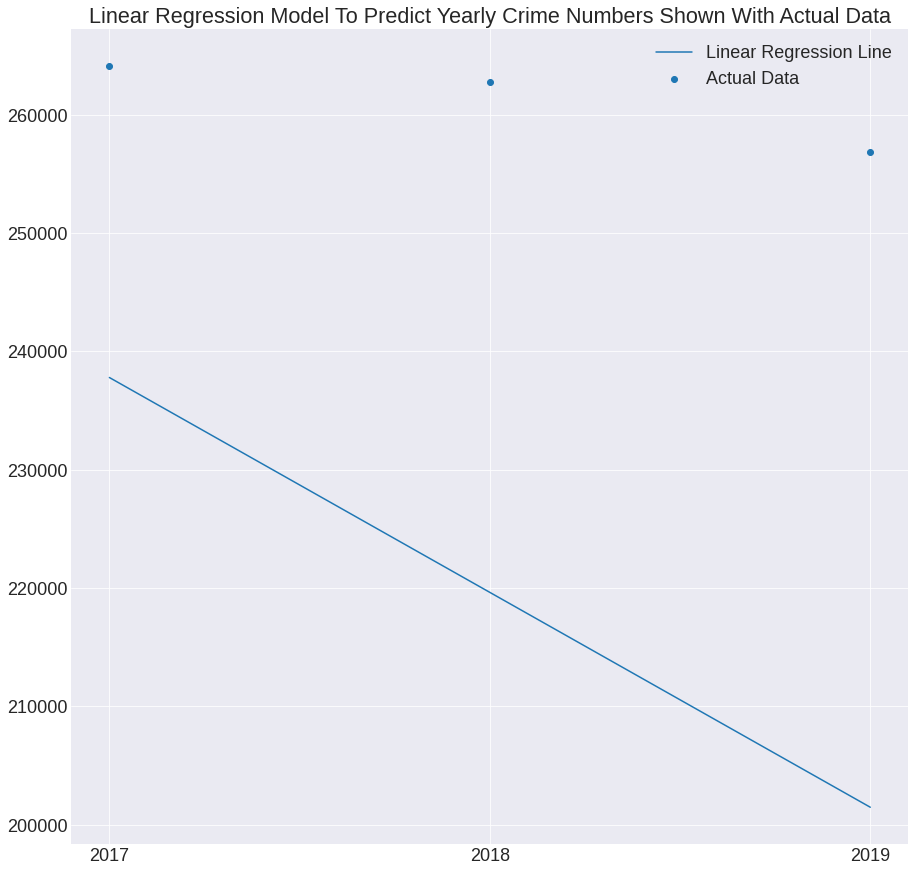

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
yr_col=yr_df_pandas['Year']
y_col=yr_df_pandas['count(ID)']
regr=linear_model.LinearRegression()
xdata=yr_col[1:15].to_numpy()
ydata=y_col[1:15].to_numpy()

#fit the model to the training data
regr.fit(xdata.reshape(-1, 1),ydata.reshape(-1, 1))
#Generate predictions
yr_ly_count_pred=regr.predict(yr_col[15:].to_numpy().reshape(-1, 1))
#generate plot and compute MSE
print('Coefficients: \n', regr.coef_)
print('Mean squared error:', mean_squared_error((y_col[15:].to_numpy().reshape(-1,1)),yr_ly_count_pred))
plt.figure(figsize=(15,15))
plt.scatter(yr_col[15:].to_numpy().reshape(-1,1), y_col[15:].to_numpy().reshape(-1,1),label='Actual Data')
plt.plot(yr_col[15:].to_numpy().reshape(-1,1), yr_ly_count_pred,label='Linear Regression Line')
plt.xticks([2017,2018,2019])
plt.legend(loc='best')
plt.title('Linear Regression Model To Predict Yearly Crime Numbers Shown With Actual Data')

As we see from the MSE and plot above a linear model is not especially great at predicting yearly trends in crime. It provides predictions in the ballpark of the actual values but it is pretty off. We can attribute this to the fact that our data doesn't appear to be linear in nature. Let's fit a polynomial model next. 

In [ ]:
import scipy.optimize as optimize

fit_poly=np.polyfit(xdata,ydata,2)

print('Coeffiecents:',fit_poly)

Coeffiecents: [-4.64003434e+02  1.84667453e+06 -1.83682322e+09]


In [ ]:
poly=np.poly1d(fit_poly)
pred=[poly(2017),poly(2018),poly(2019)]
print(pred)
print('Mean squared error:', mean_squared_error((y_col[15:].to_numpy().reshape(-1,1)),pred))

[219235.3021967411, 193655.9725265503, 167148.6359884739]
Mean squared error: 4948459220.144615


We see from the above cell that the MSE increased with the polynomial fit function and was still pretty high. Thus we conclude both of these models do not have great accuracy on the testing set.

## **Section 6: Description of Challenges / Obstacles Faced**


While completing this problem there were numerous challenges faced and obstacles that had to be overcome. First, there were the usual problems that occur in datascience, i.e. issues with data wrangling. The dataset had to be converted to the right data types and prepared for multiple different machine learning models. The main challenge with this part was converting from AM /PM time to 24 hours time and then to a timestamp datatype. Second, there was a lot for me to get used to in regards to using Apache Spark (this timestamp conversion is just one example). I wasn't as comfortable with spark syntax, MLlib, and with SQL as I was with pandas and sklearn so some things took a bit longer than I would have liked. However, I really wanted to use Spark for this project (and I did the entire project in Spark save a little bit of looking at the data) because I felt that in practice data science and machine learning methods will be done on big data, which means (I also wanted to keep in the spirit of this class). As such, I am happy I was able to use so much Spark and have definitely gotten better at it after this project! A third challenge was trying to figure out what the best methods were to get a clear picture of what was in this large dataset. Understanding which things to plot, what kind of plots to make, and which features to include in various machine learning models was a challenge (this is some of the "art" of data science). I tried my best to root all decisions in logic, however as someone that does not have a background in Crimonology, I may have benefited to an extent I do not know from some domain expertise. Fourth, a major challenge was creating predictive models with high test set accuracies. Some of the models built here did not perform well, whether that was because of the features available, the features chosen, the nature (and difficulty) of the task at hand, or the model or parameters chosen. A major challenge was creating a rigorous predictive model for each of the 3 questions posed. Additionally, I tried to curve fit an exponential model for model four predicting yearly crime rate using the scipy optimize curve fit method, however I could not get it to function in time. A final challenge was that there were alot more things I wanted to try and do with this dataset that I didn't have enough time to finish. I have described these tasks in Section 7 below.  

## **Section 7: Potential Next Steps / Future Directions**

There are multiple exciting next steps that could be taken. First, the feature space of the dataset could be expanded by getting more data. Wikipedia pages on each of the community areas in the dataset contain information such as population density, population, and median household income in the community area. These features could be really valuable. Second, really cool map visualizations could be created with this dataset. These map visualizations would provide visual insight into trends in crime throughout Chicago. Third, models predicting the weekly or monthly crime rate could be created. Fourth, as discussed in Section on 5 on predictive modeling and machine learning the models presented here could be tuned or improved with improved feature selection or engineering in order to try and increase accuracy. Features that are less correlated should be used to generate predictions. Data science is a field that is often quite iterative, and so more iterations are needed to refine and engineer the features inputted to classifiers for the tasks described in Section 5. More curve fitting approaches could be attempted (other curves like power regression or exponential regression could be tried) to predict yearly trends in the data, as those explored in this notebook appear could follow some sort of bijective or surjective function. Additionally, more statistical testing could be done (i.e. non-parametric testing as mentioned in Section 3) in order garner more rigorous results. Lastly other models like feedforward neural networks could be used as classification tools. An SVM model that draws a non-linear decision boundary via an RBF kernel function could also be tried in order to classify data better.  